# 读入函数

In [57]:
#import matplotlib    
#print(matplotlib.matplotlib_fname())

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc


In [1]:
#from matplotlib.font_manager import _rebuild
#_rebuild()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
import json
from datetime import datetime
import time

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,auc,roc_auc_score
import math
from scipy import stats

from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.feature_selection import SelectFromModel
from hyperopt import fmin,tpe,hp,partial
import shap
from sklearn.externals import joblib

from sklearn import preprocessing
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.


In [2]:
Input = tf.keras.layers.Input
Dense = tf.keras.layers.Dense
initializers = tf.initializers
regularizers = tf.keras.regularizers
optimizers = tf.keras.optimizers
Model = tf.keras.models.Model
Dropout = tf.keras.layers.Dropout
BatchNormalization = tf.keras.layers.BatchNormalization
layers = tf.keras.layers
EarlyStopping = tf.keras.callbacks.EarlyStopping
ModelCheckpoint = tf.keras.callbacks.ModelCheckpoint
plot_model = tf.keras.utils.plot_model

# 读入数据

## 申请数据 

In [117]:
application_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/application_train.csv'
data_application = pd.read_csv(application_path)

In [118]:
data_application.shape

(307511, 122)

In [119]:
data_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


## 征信数据 

In [120]:
bureau_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/bureau.csv'
data_bureau = pd.read_csv(bureau_path)

In [121]:
data_bureau.shape

(1716428, 17)

In [122]:
data_bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [123]:
bureau_balance_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/bureau_balance.csv'
data_bureau_balance = pd.read_csv(bureau_balance_path)

In [124]:
data_bureau_balance.shape

(27299925, 3)

In [125]:
data_bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


## 历史申请数据 

In [126]:
pre_application_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/previous_application.csv'
data_pre_application = pd.read_csv(pre_application_path)

In [127]:
data_pre_application.shape

(1670214, 37)

In [128]:
data_pre_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


##  历史贷款数据

In [129]:
loan_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/POS_CASH_balance.csv'
data_loan = pd.read_csv(loan_path)

In [130]:
data_loan.shape

(10001358, 8)

In [131]:
data_loan.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


## 历史信用卡消费数据

In [132]:
credit_card_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/credit_card_balance.csv'
data_credit_card = pd.read_csv(credit_card_path)

In [133]:
data_credit_card.shape

(3840312, 23)

In [134]:
data_credit_card.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,...,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,...,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,...,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,...,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,...,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,...,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


## 历史信用卡还款数据 

In [135]:
instal_payment_path = '/Users/caizhuxi/Desktop/home-credit-default-risk/data/installments_payments.csv'
data_instal_payment = pd.read_csv(instal_payment_path)

In [136]:
data_instal_payment.shape

(13605401, 8)

In [137]:
data_instal_payment.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


# 特征工程

In [138]:
def one_hot_encoder(data,dummy_na=True):
    '''
    one-hot离散化函数
    input:
    data: dataframe，原始变量数据
    dummy_na: bool，是否添加一列代表缺失值，默认True 
    return:
    data_: dataframe，one-hot之后的离散型变量
    new_columns: list，离散型变量的列名
    '''
    _data = data.copy()
    original_columns = _data.columns.tolist()
    categorical_columns = [column for column in _data.columns if _data[column].dtype=='object']
    _data = pd.get_dummies(_data,columns=categorical_columns,dummy_na=dummy_na)
    new_columns = [column for column in _data.columns if column not in original_columns]
    return _data,new_columns

## 处理申请数据 

In [139]:
#异常值替换为缺失
data_application['CODE_GENDER'].replace('XNA',np.nan,inplace=True)
data_application['DAYS_EMPLOYED'].replace(365243,np.nan,inplace= True)

In [140]:
#字符型特征离散化
data_application,new_columns_application = one_hot_encoder(data_application)

In [141]:
#衍生比例类特征
data_application['DAYS_EMPLOYED_PERC'] = data_application['DAYS_EMPLOYED'] / data_application['DAYS_BIRTH']
data_application['INCOME_CREDIT_PERC'] = data_application['AMT_INCOME_TOTAL'] / data_application['AMT_CREDIT']
data_application['INCOME_PER_PERSON'] = data_application['AMT_INCOME_TOTAL'] / data_application['CNT_FAM_MEMBERS']
data_application['ANNUITY_INCOME_PERC'] = data_application['AMT_ANNUITY'] / data_application['AMT_INCOME_TOTAL']
data_application['PAYMENT_RATE'] = data_application['AMT_ANNUITY'] / data_application['AMT_CREDIT']

## 处理征信数据 

In [142]:
#字符型特征离散化
data_bureau_balance,new_columns_bureau_balance = one_hot_encoder(data_bureau_balance)
data_bureau,new_columns_bureau = one_hot_encoder(data_bureau)

In [143]:
#合并征信数据
bb_aggregations = {'MONTHS_BALANCE': ['min', 'max', 'size']}
for column in new_columns_bureau_balance:
    bb_aggregations[column] = ['mean']
bb_agg = data_bureau_balance.groupby('SK_ID_BUREAU').agg(bb_aggregations)
bb_agg.columns = pd.Index([column[0]+'_'+column[1].upper() for column in bb_agg.columns.tolist()])
data_bureau = data_bureau.join(bb_agg, how='left', on='SK_ID_BUREAU')
data_bureau.drop(['SK_ID_BUREAU'], axis=1, inplace= True)

In [144]:
del data_bureau_balance, bb_agg

In [145]:
#衍生聚合类特征
num_aggregations = {
    'DAYS_CREDIT': ['min', 'max', 'mean', 'var'],
    'DAYS_CREDIT_ENDDATE': ['min', 'max', 'mean'],
    'DAYS_CREDIT_UPDATE': ['mean'],
    'CREDIT_DAY_OVERDUE': ['max', 'mean'],
    'AMT_CREDIT_MAX_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_DEBT': ['max', 'mean', 'sum'],
    'AMT_CREDIT_SUM_OVERDUE': ['mean'],
    'AMT_CREDIT_SUM_LIMIT': ['mean', 'sum'],
    'AMT_ANNUITY': ['max', 'mean'],
    'CNT_CREDIT_PROLONG': ['sum'],
    'MONTHS_BALANCE_MIN': ['min'],
    'MONTHS_BALANCE_MAX': ['max'],
    'MONTHS_BALANCE_SIZE': ['mean', 'sum']
}

In [146]:
cat_aggregations = {}
for cat in new_columns_bureau: cat_aggregations[cat] = ['mean']
for cat in new_columns_bureau_balance: cat_aggregations[cat + "_MEAN"] = ['mean']

In [147]:
bureau_agg = data_bureau.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
bureau_agg.columns = pd.Index(['BURO_'+column[0]+'_'+column[1].upper() for column in bureau_agg.columns.tolist()])

In [148]:
active = data_bureau[data_bureau['CREDIT_ACTIVE_Active'] == 1]
active_agg = active.groupby('SK_ID_CURR').agg(num_aggregations)
active_agg.columns = pd.Index(['ACTIVE_'+column[0]+'_'+column[1].upper() for column in active_agg.columns.tolist()])
bureau_agg = bureau_agg.join(active_agg, how='left', on='SK_ID_CURR')
del active, active_agg

In [149]:
closed = data_bureau[data_bureau['CREDIT_ACTIVE_Closed'] == 1]
closed_agg = closed.groupby('SK_ID_CURR').agg(num_aggregations)
closed_agg.columns = pd.Index(['CLOSED_'+column[0]+'_'+column[1].upper() for column in closed_agg.columns.tolist()])
bureau_agg = bureau_agg.join(closed_agg, how='left', on='SK_ID_CURR')
del closed, closed_agg, data_bureau

In [150]:
gc.collect()

31782

## 处理历史申请数据 

In [151]:
#异常值替换为缺失
data_pre_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace= True)
data_pre_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace= True)
data_pre_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace= True)
data_pre_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace= True)
data_pre_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace= True)

In [152]:
#字符型特征离散化
data_pre_application, new_columns_pre_application = one_hot_encoder(data_pre_application)

In [153]:
#衍生比例类特征
data_pre_application['APP_CREDIT_PERC'] = data_pre_application['AMT_APPLICATION'] / data_pre_application['AMT_CREDIT']

In [154]:
#衍生聚合类特征
num_aggregations = {
    'AMT_ANNUITY': ['min', 'max', 'mean'],
    'AMT_APPLICATION': ['min', 'max', 'mean'],
    'AMT_CREDIT': ['min', 'max', 'mean'],
    'APP_CREDIT_PERC': ['min', 'max', 'mean', 'var'],
    'AMT_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'AMT_GOODS_PRICE': ['min', 'max', 'mean'],
    'HOUR_APPR_PROCESS_START': ['min', 'max', 'mean'],
    'RATE_DOWN_PAYMENT': ['min', 'max', 'mean'],
    'DAYS_DECISION': ['min', 'max', 'mean'],
    'CNT_PAYMENT': ['mean', 'sum'],
}

In [155]:
cat_aggregations = {}
for cat in new_columns_pre_application:
    cat_aggregations[cat] = ['mean']

In [156]:
prev_agg = data_pre_application.groupby('SK_ID_CURR').agg({**num_aggregations, **cat_aggregations})
prev_agg.columns = pd.Index(['PREV_'+column[0]+'_'+column[1].upper() for column in prev_agg.columns.tolist()])

In [157]:
approved = data_pre_application[data_pre_application['NAME_CONTRACT_STATUS_Approved'] == 1]
approved_agg = approved.groupby('SK_ID_CURR').agg(num_aggregations)
approved_agg.columns = pd.Index(['APPROVED_'+column[0]+'_'+column[1].upper() for column in approved_agg.columns.tolist()])
prev_agg = prev_agg.join(approved_agg, how='left', on='SK_ID_CURR')
del approved, approved_agg

In [158]:
refused = data_pre_application[data_pre_application['NAME_CONTRACT_STATUS_Refused'] == 1]
refused_agg = refused.groupby('SK_ID_CURR').agg(num_aggregations)
refused_agg.columns = pd.Index(['REFUSED_'+column[0]+'_'+column[1].upper() for column in refused_agg.columns.tolist()])
prev_agg = prev_agg.join(refused_agg, how='left', on='SK_ID_CURR')
del refused, refused_agg, data_pre_application

In [159]:
gc.collect()

20

## 处理历史贷款数据 

In [160]:
#字符型特征离散化
data_loan, new_columns_loan = one_hot_encoder(data_loan)

In [161]:
#衍生聚合类特征
aggregations = {
    'MONTHS_BALANCE': ['max', 'mean', 'size'],
    'SK_DPD': ['max', 'mean'],
    'SK_DPD_DEF': ['max', 'mean']
}

In [162]:
for cat in new_columns_loan:
    aggregations[cat] = ['mean']

In [163]:
loan_agg = data_loan.groupby('SK_ID_CURR').agg(aggregations)
loan_agg.columns = pd.Index(['POS_'+column[0]+'_'+column[1].upper() for column in loan_agg.columns.tolist()])

In [164]:
loan_agg['POS_COUNT'] = data_loan.groupby('SK_ID_CURR').size()

In [165]:
del data_loan

In [166]:
gc.collect()

60

## 处理历史信用卡消费数据 

In [167]:
#字符型特征离散化
data_credit_card, new_columns_credit_card = one_hot_encoder(data_credit_card)

In [168]:
#衍生聚合类特征
data_credit_card.drop(['SK_ID_PREV'], axis= 1, inplace = True)
cc_agg = data_credit_card.groupby('SK_ID_CURR').agg(['min', 'max', 'mean', 'sum', 'var'])
cc_agg.columns = pd.Index(['CC_'+column[0]+'_'+column[1].upper() for column in cc_agg.columns.tolist()])

In [169]:
cc_agg['CC_COUNT'] = data_credit_card.groupby('SK_ID_CURR').size()

In [170]:
del data_credit_card

In [171]:
gc.collect()

60

## 处理历史信用卡还款数据

In [172]:
#字符型特征离散化
data_instal_payment, new_columns_instal_payment = one_hot_encoder(data_instal_payment)

In [173]:
#衍生特征
data_instal_payment['PAYMENT_PERC'] = data_instal_payment['AMT_PAYMENT'] / data_instal_payment['AMT_INSTALMENT']
data_instal_payment['PAYMENT_DIFF'] = data_instal_payment['AMT_INSTALMENT'] - data_instal_payment['AMT_PAYMENT']
data_instal_payment['DPD'] = data_instal_payment['DAYS_ENTRY_PAYMENT'] - data_instal_payment['DAYS_INSTALMENT']
data_instal_payment['DBD'] = data_instal_payment['DAYS_INSTALMENT'] - data_instal_payment['DAYS_ENTRY_PAYMENT']
data_instal_payment['DPD'] = data_instal_payment['DPD'].apply(lambda x: x if x > 0 else 0)
data_instal_payment['DBD'] = data_instal_payment['DBD'].apply(lambda x: x if x > 0 else 0)

In [174]:
#衍生聚合类特征
aggregations = {
    'NUM_INSTALMENT_VERSION': ['nunique'],
    'DPD': ['max', 'mean', 'sum'],
    'DBD': ['max', 'mean', 'sum'],
    'PAYMENT_PERC': ['max', 'mean', 'sum', 'var'],
    'PAYMENT_DIFF': ['max', 'mean', 'sum', 'var'],
    'AMT_INSTALMENT': ['max', 'mean', 'sum'],
    'AMT_PAYMENT': ['min', 'max', 'mean', 'sum'],
    'DAYS_ENTRY_PAYMENT': ['max', 'mean', 'sum']
}

In [175]:
for cat in new_columns_instal_payment:
    aggregations[cat] = ['mean']

In [176]:
ins_agg = data_instal_payment.groupby('SK_ID_CURR').agg(aggregations)
ins_agg.columns = pd.Index(['INSTAL_'+column[0]+'_'+column[1].upper() for column in ins_agg.columns.tolist()])

In [177]:
ins_agg['INSTAL_COUNT'] = data_instal_payment.groupby('SK_ID_CURR').size()

In [178]:
del data_instal_payment

In [179]:
gc.collect()

60

## 合并大宽表 

In [66]:
data = data_application.join(bureau_agg, how='left', on='SK_ID_CURR')

In [67]:
data = data.join(prev_agg, how='left', on='SK_ID_CURR')

In [68]:
data = data.join(loan_agg, how='left', on='SK_ID_CURR')

In [69]:
data = data.join(cc_agg, how='left', on='SK_ID_CURR')

In [70]:
data = data.join(ins_agg, how='left', on='SK_ID_CURR')

In [71]:
data.shape

(307511, 816)

In [73]:
data.to_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/homecredit_feature.csv',index=False)

In [74]:
gc.collect()

80

In [3]:
#data = pd.read_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/homecredit_feature.csv')

In [4]:
data = data.replace(np.inf,np.nan)

# 特征分布

In [5]:
data.head()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,INSTAL_AMT_INSTALMENT_MEAN,INSTAL_AMT_INSTALMENT_SUM,INSTAL_AMT_PAYMENT_MIN,INSTAL_AMT_PAYMENT_MAX,INSTAL_AMT_PAYMENT_MEAN,INSTAL_AMT_PAYMENT_SUM,INSTAL_DAYS_ENTRY_PAYMENT_MAX,INSTAL_DAYS_ENTRY_PAYMENT_MEAN,INSTAL_DAYS_ENTRY_PAYMENT_SUM,INSTAL_COUNT
0,100002,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,...,11559.247105,219625.695,9251.775,53093.745,11559.247105,219625.695,-49.0,-315.421053,-5993.0,19.0
1,100003,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188.0,...,64754.586000,1618864.650,6662.970,560835.360,64754.586000,1618864.650,-544.0,-1385.320000,-34633.0,25.0
2,100004,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225.0,...,7096.155000,21288.465,5357.250,10573.965,7096.155000,21288.465,-727.0,-761.666667,-2285.0,3.0
3,100006,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039.0,...,62947.088438,1007153.415,2482.920,691786.890,62947.088438,1007153.415,-12.0,-271.625000,-4346.0,16.0
4,100007,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038.0,...,12666.444545,835985.340,0.180,22678.785,12214.060227,806127.975,-14.0,-1032.242424,-68128.0,66.0


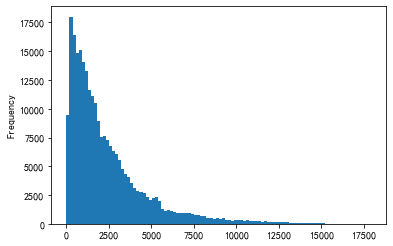

In [35]:
fig=plt.figure()
ax=fig.add_subplot(111)
data['DAYS_EMPLOYED'].abs().plot(kind='hist',bins=100,ax=ax)
plt.show()

# 特征EDA 

In [6]:
def EDA_series(data):
    '''
    series的EDA函数
    input:
    data: series，原始数据
    return:
    result: series，原始数据EDA结果
    '''
    result = {}
    result['count'] = len(data)
    result['missing_count'] = data.isnull().sum()
    result['missing_rate'] = result['missing_count'] / result['count']
    result['count_unique'] = len(data.value_counts(normalize=True))
    data.dropna(inplace=True)
    if data.dtype=='object':
        result['type'] = 'categorical'
    else:
        result['type'] = 'numeric'
        result['max'] = data.max()
        result['min'] = data.min()
        result['mean'] = data.mean()
        result['std'] = data.std() 
        zscore = (data-data.mean()) / data.std()
        result['outlier_count'] = (zscore.abs()>6).sum()
        result['outlier_rate'] = result['outlier_count'] / result['count']
    if result['count_unique']<=2:
        result['type'] = 'binary'
    result = pd.Series(result)
    return result

In [7]:
def EDA_df(data):
    '''
    dataframe的EDA函数
    input:
    data: dataframe，原始数据
    return:
    result: dataframe，原始数据EDA结果，index为特征名
    '''
    result = []
    for column in data.columns.tolist():
        tmp = EDA_series(data[column])
        tmp.name = column
        result.append(tmp)
    result = pd.concat(result,axis=1).T
    columns_result = ['type','count','count_unique','max','min','mean','std','missing_count','missing_rate','outlier_count','outlier_rate']
    result = result[columns_result]
    return result

In [8]:
eda_stat = EDA_df(data)

In [9]:
eda_stat.head()

,type,count,count_unique,max,min,mean,std,missing_count,missing_rate,outlier_count,outlier_rate
SK_ID_CURR,numeric,307511,307511,456255,100002,278181,102790,0,0,0,0
TARGET,binary,307511,2,1,0,0.0807288,0.272419,0,0,0,0
CNT_CHILDREN,numeric,307511,15,19,0,0.417052,0.722121,0,0,126,0.000409741
AMT_INCOME_TOTAL,numeric,307511,2548,1.17e+08,25650,168798,237123,0,0,65,0.000211375
AMT_CREDIT,numeric,307511,5603,4.05e+06,45000,599026,402491,0,0,32,0.000104061


In [182]:
eda_stat.to_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/eda_stat.csv')

In [5]:
#eda_stat = pd.read_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/eda_stat.csv',index_col=['Unnamed: 0'])

# 特征筛选 

## 去除缺失率高、类别较少以及字符型变量 

In [6]:
columns_drop = eda_stat[(eda_stat['missing_rate']>0.9)|(eda_stat['count_unique']<=1)|(eda_stat['type']=='categorical')].index

In [8]:
len(columns_drop)

40

In [9]:
data = data.drop(columns_drop,axis=1)

# LR模型

In [10]:
data_lr = data.copy()

## 去除IV较低的变量 

In [10]:
def discretize(data,columns_continous,quantiles):
    '''
    等频分bin函数
    input:
    data: dataframe，原始变量数据
    columns_continous: list，连续型变量列表
    quantiles: list，等频分bin的分位点列表
    return:
    data_bin: dataframe，分bin后的数据，每个bin为字符型
    '''
    data_bin = data.copy()
    columns_cate = [column for column in data_bin.columns if column not in columns_continous]
    for column in columns_continous:
        X = data_bin[column].copy()
        for i in range(len(quantiles)-1):
            left = X.quantile(quantiles[i])
            right = X.quantile(quantiles[i+1])
            if i<len(quantiles)-2:
                group = '['+str(left)+','+str(right)+')'
                data_bin[column].iloc[np.where((X>=left)&(X<right))]=group
            if i==len(quantiles)-2:
                group = '['+str(left)+','+str(right)+']'
                data_bin[column].iloc[np.where((X>=left)&(X<=right))]=group
        data_bin[column].fillna('nan',inplace=True)
    for column in columns_cate:
        data_bin[column] = data_bin[column].astype(str)
    return data_bin

In [11]:
def woe_iv_calc(data_bin,y):
    '''
    计算woe和iv函数
    input:
    data_bin: dataframe，分bin后的数据
    y: series，目标变量，值为0或1
    return:
    data_woe: dataframe，woe映射后的数据
    map_woe: dict，key为变量名，value为每个bin对应的woe值
    map_iv: dict，key为变量名，value为iv值
    '''
    data_woe = data_bin.copy()
    map_woe = {}
    map_iv = {}
    for column in data_woe.columns:
        cross = pd.crosstab(data_woe[column],y)
        cross[cross==0] = 1 #解决分母为0问题
        cross = cross/cross.sum(axis=0)
        woe = np.log(cross[0]/cross[1])
        iv = ((cross[0]-cross[1])*np.log(cross[0]/cross[1])).sum()
        map_woe[column] = dict(woe)
        map_iv[column] = iv
        data_woe[column] = data_woe[column].map(dict(woe))
    return data_woe,map_woe,map_iv

In [11]:
X_columns = data_lr.columns[2:]
Y_columns = 'TARGET'

In [12]:
columns_continous = eda_stat[eda_stat['count_unique']>10].index.tolist()
columns_continous = [column for column in columns_continous if column!='SK_ID_CURR']

In [13]:
len(columns_continous)

561

In [14]:
quantiles = [0.1*i for i in range(11)]

In [ ]:
data_bin = discretize(data_lr[X_columns],columns_continous,quantiles)

In [19]:
data_woe,map_woe,map_iv = woe_iv_calc(data_bin,data_lr[Y_columns])

In [35]:
data_bin.to_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/homecredit_feature_bin.csv',index=False)

In [22]:
data_woe.to_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/homecredit_feature_woe.csv',index=False)

In [31]:
with open('/Users/caizhuxi/Desktop/home-credit-default-risk/map_woe.json','w') as json_file:
    json.dump(map_woe, json_file)

In [32]:
with open('/Users/caizhuxi/Desktop/home-credit-default-risk/map_iv.json','w') as json_file:
    json.dump(map_iv, json_file)

In [15]:
#data_woe = pd.read_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/homecredit_feature_woe.csv')

In [16]:
#with open('/Users/caizhuxi/Desktop/home-credit-default-risk/map_woe.json','r') as json_file:
    #map_woe = json.load(json_file)

In [17]:
#with open('/Users/caizhuxi/Desktop/home-credit-default-risk/map_iv.json','r') as json_file:
    #map_iv = json.load(json_file)

In [19]:
map_iv_sorted = sorted(map_iv.items(),key=lambda x:x[1],reverse=True)
map_iv_sorted[:10]

[('EXT_SOURCE_3', 0.3294682255936796),
 ('EXT_SOURCE_2', 0.30648950864961816),
 ('EXT_SOURCE_1', 0.1509371175877831),
 ('PAYMENT_RATE', 0.1436215209610871),
 ('BURO_DAYS_CREDIT_MEAN', 0.12270204917439327),
 ('DAYS_EMPLOYED', 0.1111689215810491),
 ('BURO_CREDIT_ACTIVE_Closed_MEAN', 0.09396940919070987),
 ('BURO_DAYS_CREDIT_UPDATE_MEAN', 0.09347527549061925),
 ('DAYS_EMPLOYED_PERC', 0.09033253412197234),
 ('BURO_CREDIT_ACTIVE_Active_MEAN', 0.08453581874237763)]

In [20]:
columns_imp = list({key for key,value in map_iv.items() if value>0.02})

In [21]:
len(columns_imp)

264

In [22]:
data_lr = data_lr[['SK_ID_CURR','TARGET']+columns_imp]

## 去除相关性较高的变量 

In [23]:
columns_select = sorted(data_lr.columns[2:])

In [24]:
data_cor = data_lr[columns_select].corr().abs()
data_cor_lower = pd.DataFrame(np.tril(data_cor),index=data_cor.index,columns=data_cor.columns)

In [25]:
columns_drop = []
for column in data_cor_lower:
    data_cor_select = pd.DataFrame(data_cor_lower.loc[(data_cor_lower[column]>0.8)&(data_cor_lower[column]<1),column])
    if len(data_cor_select)>0:
        data_cor_select = pd.DataFrame(data=data_cor_select.columns.tolist()+data_cor_select.index.tolist(),columns=['column_name'])
        data_cor_select['IV'] = data_cor_select['column_name'].map(map_iv)
        data_cor_select = data_cor_select.sort_values(by='IV',ascending=False)
        columns_drop = columns_drop+data_cor_select['column_name'].tolist()[1:]        

In [26]:
columns_select = [column for column in columns_select if column not in columns_drop]

In [27]:
len(columns_select)

130

In [28]:
data_lr = data_lr[['SK_ID_CURR','TARGET']+columns_select]

## 去除多重共线性较高的变量 

In [29]:
data_vif = data_lr.iloc[:,2:].copy()
data_vif = sm.add_constant(data_vif)
data_vif = data_vif.replace([np.nan,np.inf],-9999)

In [30]:
vif_select = pd.DataFrame(data=data_vif.columns,columns=['column_name'])
vif_select['VIF'] = [variance_inflation_factor(data_vif.values,i) for i in range(data_vif.shape[1])]

In [31]:
columns_select = vif_select.loc[vif_select['VIF']<10,'column_name'].tolist()
columns_select = [column for column in columns_select if 'const' not in column]

In [32]:
len(columns_select)

69

In [33]:
data_lr = data_lr[['SK_ID_CURR','TARGET']+columns_select]

## 保留WOE单调性较好的变量 

In [34]:
map_iv_select = {k:v for k,v in map_iv.items() if k in columns_select}

In [35]:
map_iv_select_sorted = sorted(map_iv_select.items(),key=lambda x:x[1],reverse=True)
map_iv_select_sorted

[('EXT_SOURCE_3', 0.3294682255936796),
 ('EXT_SOURCE_2', 0.30648950864961816),
 ('EXT_SOURCE_1', 0.1509371175877831),
 ('PAYMENT_RATE', 0.1436215209610871),
 ('DAYS_EMPLOYED', 0.1111689215810491),
 ('DAYS_BIRTH', 0.08417576156373006),
 ('BURO_DAYS_CREDIT_ENDDATE_MEAN', 0.07135306696799698),
 ('CLOSED_AMT_CREDIT_SUM_MAX', 0.054137355132498594),
 ('BURO_AMT_CREDIT_SUM_DEBT_MEAN', 0.053347918747864966),
 ('CLOSED_AMT_CREDIT_SUM_SUM', 0.05249458998211212),
 ('AMT_GOODS_PRICE', 0.052292366296691144),
 ('REGION_RATING_CLIENT_W_CITY', 0.05120149755009072),
 ('REFUSED_AMT_CREDIT_MIN', 0.0510409044830019),
 ('NAME_EDUCATION_TYPE_Higher education', 0.04921436154586074),
 ('BURO_AMT_CREDIT_SUM_DEBT_SUM', 0.04774280228818341),
 ('BURO_DAYS_CREDIT_ENDDATE_MAX', 0.04752676484285609),
 ('DAYS_LAST_PHONE_CHANGE', 0.04695099089633728),
 ('REFUSED_AMT_APPLICATION_MAX', 0.04679487486048381),
 ('CLOSED_DAYS_CREDIT_VAR', 0.04557928934534703),
 ('NAME_INCOME_TYPE_Working', 0.0453177784697182),
 ('INSTAL_PAY

In [36]:
map_woe_select = {k:v for k,v in map_woe.items() if k in columns_select}

In [37]:
map_woe_select_sorted = {}
for key in [k for k,v in map_woe_select.items()]:
    data = pd.Series(map_woe_select[key])
    data = data.reset_index()
    data['left'] = -np.inf
    if key in columns_continous:
        data.loc[data['index']!='nan','left'] = data.loc[data['index']!='nan','index'].map(lambda X:float(X.split(',')[0].split('[')[1]))
    else:
        data.loc[data['index']!='nan','left'] = data.loc[data['index']!='nan','index'].map(lambda X:float(X))
    data = data.sort_values(by='left')
    data = data.drop('left',axis=1).set_index('index')
    data.index.name=''
    data.name=''
    map_woe_select_sorted[key] = data.to_dict()[0]

In [38]:
for key in [k for k,v in map_woe_select_sorted.items()]:
    data = pd.Series(map_woe_select_sorted[key])
    data = data.reset_index()
    if key in columns_continous:
        for index in data['index']:
            if index!='nan':
                left = round(float(index.split(',')[0].split('[')[1]),4)
                if ')' in index:
                    right = round(float(index.split(',')[1].split(')')[0]),4)
                    data.loc[data['index']==index,'index'] = '['+str(left)+','+str(right)+')'
                if ']' in index:
                    right = round(float(index.split(',')[1].split(']')[0]),4)
                    data.loc[data['index']==index,'index'] = '['+str(left)+','+str(right)+']'
    data = data.set_index('index')    
    data.index.name=''
    data.name=''
    map_woe_select_sorted[key] = data.to_dict()[0]

In [39]:
map_woe_select_sorted

{'AMT_ANNUITY': {'nan': 0.052461399870463256,
  '[1615.5,11074.5)': 0.14337301262117041,
  '[11074.5,14701.5)': 0.18111153987189973,
  '[14701.5,18189.0)': -0.053943457787032446,
  '[18189.0,21865.5)': -0.07704381720965926,
  '[21865.5,24903.0)': -0.05451071968170457,
  '[24903.0,28062.0)': -0.1343105425509672,
  '[28062.0,32004.0)': -0.2428219844664343,
  '[32004.0,37516.5)': -0.07096346656225576,
  '[37516.5,45954.0)': 0.06760537615466254,
  '[45954.0,258025.5]': 0.3518669360183033},
 'AMT_GOODS_PRICE': {'nan': 0.07206811609173988,
  '[40500.0,180000.0)': 0.17121058646479587,
  '[180000.0,225000.0)': -0.040093493173586986,
  '[225000.0,270000.0)': -0.07791278724528641,
  '[270000.0,373500.0)': -0.13238178895554917,
  '[373500.0,450000.0)': -0.42074570512355264,
  '[450000.0,522000.0)': -0.24809304444463878,
  '[522000.0,675000.0)': 0.015109410270586125,
  '[675000.0,814500.0)': 0.08834168594534077,
  '[814500.0,1093500.0)': 0.2267098914392112,
  '[1093500.0,4050000.0]': 0.52965241570

In [40]:
def woe_plot(map_woe,close=True,show_last=True):
    '''
    woe分布图
    input:
    map_woe: dict，key为变量名，value为每个bin对应的woe值，建议bin预先排序方便观察单调性
    close: bool，是否打印woe分布图，默认True
    show_last: bool，是否只保留最后一个变量的woe分布图，默认True
    return:
    result: dict，key为变量名，value为每个变量的woe分布图
    '''
    result={}
    for i,feature in enumerate(map_woe):
        data=pd.Series(map_woe[feature])
        data.index.name=''
        data.name=''
        fig=plt.figure()
        ax=fig.add_subplot(111)
        data.plot(kind='bar',ax=ax)
        ax.set_xlabel('变量分箱')
        ax.set_ylabel('woe值')
        ax.set_title('%s' %feature)
        result[feature]=fig
        if close and show_last and i<len(map_woe)-1:
            plt.close('all')
    return result

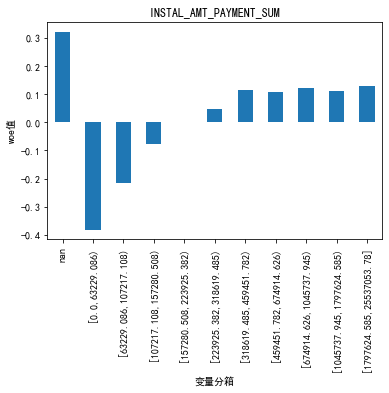

In [41]:
figs_woe = woe_plot(map_woe_select_sorted)

In [42]:
outfile = '/Users/caizhuxi/Desktop/home-credit-default-risk/woe/'
for key in figs_woe:
    figs_woe[key].savefig(outfile+'%s.png' %key,bbox_inches = 'tight')

In [50]:
columns_select = [
    'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_EMPLOYED','DAYS_BIRTH','BURO_DAYS_CREDIT_ENDDATE_MEAN',
    'CLOSED_AMT_CREDIT_SUM_MAX','BURO_AMT_CREDIT_SUM_DEBT_MEAN','CLOSED_AMT_CREDIT_SUM_SUM','AMT_GOODS_PRICE',
    'REGION_RATING_CLIENT_W_CITY'
]

In [51]:
len(columns_select)

11

In [52]:
data_lr = data_lr[['SK_ID_CURR','TARGET']+columns_select]

## 训练LR模型 

In [53]:
data_lr[columns_select] = data_woe[columns_select]

In [54]:
print(len(data_lr[data_lr['TARGET']==0]))
print(len(data_lr[data_lr['TARGET']==1]))

282686
24825


In [55]:
X_columns = data_lr.columns[2:]
Y_columns = 'TARGET'

In [56]:
X_train,X_test,y_train,y_test = train_test_split(data_lr[X_columns],data_lr[Y_columns],test_size=0.3,random_state=0)

In [48]:
tuned_parameters = [{'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10]}]

In [107]:
clf = GridSearchCV(LogisticRegression(),tuned_parameters,cv=5,scoring='roc_auc')

In [108]:
clf.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.001, 0.01, 0.1, 1, 10],
                          'penalty': ['l1', 'l2']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [110]:
clf.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [57]:
lr = LogisticRegression(penalty='l2',C=0.1)

In [58]:
lr_clf = lr.fit(X_train,y_train)

In [30]:
def auc_calc(data,score_col,class_col):
    '''
    计算AUC值，并输出ROC曲线
    input:
    data: dataframe，包括预测prob和真实label
    score_col: list，预测prob，一般为0-1之间的概率
    class_col: list，真实label，一般为0或1
    return:
    auc_dict: dict，键值关系为{'auc': AUC值，'auc_fig': ROC曲线}
    '''
    auc_dict = {}
    fpr,tpr,threshold = roc_curve((1-data[class_col[0]]).ravel(),data[score_col[0]].ravel())
    roc_auc = auc(fpr,tpr)
    fig = plt.figure()
    plt.plot(fpr,tpr,color='b',label='ROC曲线下面积=%0.4f'%roc_auc,alpha=0.3)
    plt.plot([0,1],[0,1],color='r',linestyle='--',alpha=0.3)
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('假阳率')
    plt.ylabel('真阳率')
    plt.title('ROC曲线')
    plt.legend(loc='lower right')
    plt.close()
    auc_dict['auc'] = roc_auc
    auc_dict['auc_fig'] = fig
    return auc_dict

In [31]:
def ks_calc(data,score_col,class_col):
    '''
    计算KS值，并输出对应分割点和累计分布函数曲线图
    input:
    data: dataframe，包括预测prob和真实label
    score_col: list，预测prob，一般为0-1之间的概率
    class_col: list，真实label，一般为0或1
    return:
    ks_dict: dict，键值关系为{'ks': KS值，'split': KS值对应节点，'fig': 累计分布函数曲线图}
    '''
    ks_dict = {}
    Bad = data.loc[data[class_col[0]]==1,score_col[0]]
    Good = data.loc[data[class_col[0]]==0, score_col[0]]
    ks,pvalue = stats.ks_2samp(Bad.values,Good.values)
    crossfreq = pd.crosstab(data[score_col[0]],data[class_col[0]])
    crossdens = crossfreq.cumsum(axis=0) / crossfreq.sum()
    crossdens['gap'] = abs(crossdens[0] - crossdens[1])
    score_split = crossdens[crossdens['gap'] == crossdens['gap'].max()].index[0]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    crossdens[[0]].plot(kind='line',ax=ax)
    crossdens[[1]].plot(kind='line',style='--',ax=ax)
    ax.set_xlabel('模型分数')
    ax.set_ylabel('累计占比')
    ax.set_title('CDF曲线')
    plt.close()
    ks_dict['ks'] = ks
    ks_dict['split'] = score_split
    ks_dict['ks_fig'] = fig
    return ks_dict

In [32]:
def psi_calc(actual,predict,bins=10):
    '''
    计算PSI值，并输出实际和预测占比分布曲线
    input:
    actual: series，实际值
    predict: series，预测值
    bins: int，等频分bin的个数
    return:
    psi_dict: dict，键值关系为{'psi': PSI值，'psi_fig': 实际和预期占比分布曲线}
    '''
    psi_dict = {}
    psi_cut = []
    actual_bins = []
    predict_bins = []
    actual_len = len(actual)
    predict_len = len(predict)
    if actual.isnull().any() == True:
        bins = bins-1
        actual_cnt = actual.isna().sum()
        predict_cnt = predict.isna().sum()
        actual_pct = (actual_cnt+0.0) / actual_len
        predict_pct = (predict_cnt+0.0) / predict_len
        psi = (predict_pct-actual_pct) * math.log((predict_pct+0.00000001)/actual_pct)
        psi_cut.append(psi)
        actual_bins.append(actual_pct)
        predict_bins.append(predict_pct)
    if len(actual)>0:
        actual_values = actual.value_counts()
        if (len(actual_values)<bins):
            cuts = actual_values.index.values.tolist()
        else:
            out,bin_cut = pd.qcut(actual,bins,retbins=True,duplicates='drop')
            cuts = bin_cut.tolist()[1:-1]
        bins_after = len(cuts)+1
        for i in range(1,(bins_after+1)):
            if i==1:
                lowercut = -np.inf
                uppercut = cuts[i-1]
            elif i==bins_after:
                lowercut = cuts[i-2]
                uppercut = np.inf
            else:
                lowercut = cuts[i-2]
                uppercut = cuts[i-1]
            actual_cnt = ((actual>=lowercut) & (actual<uppercut)).sum()+1
            predict_cnt = ((predict>=lowercut) & (predict<uppercut)).sum()+1
            actual_pct = (actual_cnt+0.0) / actual_len
            predict_pct = (predict_cnt+0.0) / predict_len
            psi = (predict_pct-actual_pct) * math.log((predict_pct+0.00000001)/actual_pct)
            psi_cut.append(psi)
            actual_bins.append(actual_pct)
            predict_bins.append(predict_pct)
    psi = sum(psi_cut)
    nbins = len(actual_bins)
    xlab = np.arange(1, nbins+1)
    fig = plt.figure()
    plt.plot(xlab, np.array(actual_bins),'r',label='actual')
    plt.plot(xlab, np.array(predict_bins),'b',label='predict')
    plt.legend(loc='best')
    plt.title('PSI曲线')
    plt.close()
    psi_dict['psi'] = psi
    psi_dict['psi_fig'] = fig
    return psi_dict

## 模型评估 

In [62]:
data_train = data_lr.iloc[X_train.index,:]
data_test = data_lr.iloc[X_test.index,:]

In [94]:
data_train['prob'] = lr_clf.predict_proba(X_train)[:,0]
auc_dict = auc_calc(data_train,['prob'],['TARGET'])
ks_dict = ks_calc(data_train,['prob'],['TARGET'])
auc_value = auc_dict['auc']
ks_value = ks_dict['ks']
print('train auc: %f\ntrain ks: %f' %(auc_value,ks_value))

train auc: 0.730355
train ks: 0.342685


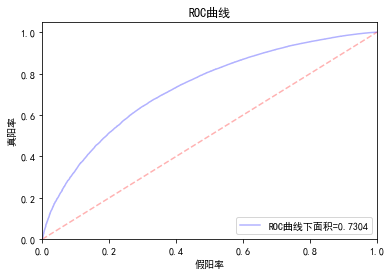

In [91]:
auc_dict['auc_fig']

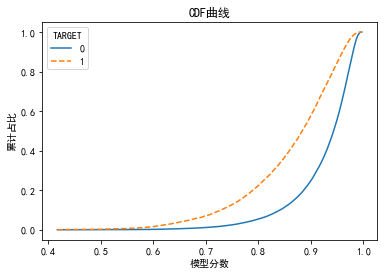

In [95]:
ks_dict['ks_fig']

In [86]:
data_test['prob'] = lr_clf.predict_proba(X_test)[:,0]
auc_dict = auc_calc(data_test,['prob'],['TARGET'])
ks_dict = ks_calc(data_test,['prob'],['TARGET'])
psi_dict = psi_calc(data_train['prob'],data_test['prob'])
auc_value = auc_dict['auc']
ks_value = ks_dict['ks']
psi_value = psi_dict['psi']
print('test auc: %f\ntest ks: %f\ntest psi: %f' %(auc_value,ks_value,psi_value))

test auc: 0.731616
test ks: 0.343340
test psi: 0.000192


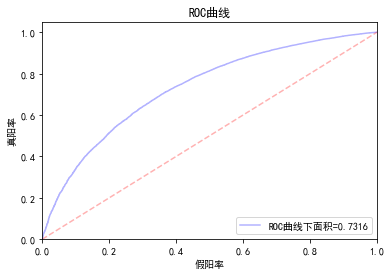

In [87]:
auc_dict['auc_fig']

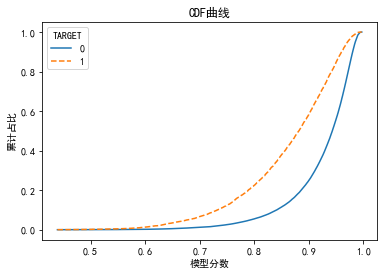

In [88]:
ks_dict['ks_fig']

# Xgboost模型

In [10]:
data_xgb = data.copy()

In [11]:
data_xgb = data_xgb.fillna(-9999)

## 利用重要性筛选变量 

In [12]:
print(len(data_xgb[data_xgb['TARGET']==0]))
print(len(data_xgb[data_xgb['TARGET']==1]))

282686
24825


In [13]:
X_columns = data_xgb.columns[2:]
Y_columns = ['TARGET']

In [14]:
X_train,X_test,y_train,y_test = train_test_split(data_xgb[X_columns],data_xgb[Y_columns],test_size=0.3,random_state=0)

In [16]:
X_matrix_train = X_train.values
Y_matrix_train = y_train.values
X_matrix_test = X_test.values
Y_matrix_test = y_test.values

In [17]:
xgb_clf = XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=10,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',seed=0,n_jobs=-1)

In [61]:
print(datetime.now())
xgb_clf.fit(X_matrix_train,Y_matrix_train,eval_metric='auc')
y_pred = xgb_clf.predict_proba(X_matrix_test)[:,1]
fpr,tpr,threshold = roc_curve(Y_matrix_test,y_pred)
roc_auc = auc(fpr,tpr)
print('test auc: %f' %roc_auc)
print(datetime.now())

2020-05-12 22:27:36.728116
test auc: 0.780152
2020-05-12 22:31:59.017427


In [62]:
threshold = np.sort(xgb_clf.feature_importances_)

In [63]:
threshold[400:700:10]

array([0.00037028, 0.00081211, 0.00113294, 0.00126187, 0.00135518,
       0.00145159, 0.00152124, 0.00157476, 0.00164892, 0.00172406,
       0.00176886, 0.00182306, 0.00187735, 0.00193245, 0.00198193,
       0.00202007, 0.00207766, 0.00219833, 0.00227322, 0.00233315,
       0.0023762 , 0.00241307, 0.00248614, 0.00253444, 0.00261915,
       0.00266226, 0.00277609, 0.00293215, 0.00304221, 0.00317358],
      dtype=float32)

In [65]:
print(datetime.now())
for thresh in threshold[400:700:10]:
    selection = SelectFromModel(xgb_clf, threshold=thresh, prefit=True)
    X_train_selection = selection.transform(X_matrix_train)
    selection_model = XGBClassifier(learning_rate=0.1,n_estimators=100,max_depth=5,min_child_weight=10,subsample=0.8,colsample_bytree=0.8,objective='binary:logistic',seed=0,n_jobs=-1)
    selection_model.fit(X_train_selection,Y_matrix_train,eval_metric='auc')
    X_test_selection = selection.transform(X_matrix_test)
    y_pred = selection_model.predict_proba(X_test_selection)[:,1]
    fpr,tpr,threshold = roc_curve(Y_matrix_test,y_pred)
    roc_auc = auc(fpr,tpr)
    print('thresh=%.4f, n=%d, test auc: %f' % (thresh,X_train_selection.shape[1],roc_auc))
print(datetime.now())

2020-05-12 22:36:31.589478
thresh=0.0004, n=374, test auc: 0.780304
thresh=0.0008, n=364, test auc: 0.780899
thresh=0.0011, n=354, test auc: 0.779613
thresh=0.0013, n=344, test auc: 0.779540
thresh=0.0014, n=334, test auc: 0.778719
thresh=0.0015, n=324, test auc: 0.780189
thresh=0.0015, n=314, test auc: 0.779547
thresh=0.0016, n=304, test auc: 0.780607
thresh=0.0016, n=294, test auc: 0.780585
thresh=0.0017, n=284, test auc: 0.780534
thresh=0.0018, n=274, test auc: 0.780285
thresh=0.0018, n=264, test auc: 0.780073
thresh=0.0019, n=254, test auc: 0.780113
thresh=0.0019, n=244, test auc: 0.779614
thresh=0.0020, n=234, test auc: 0.779338
thresh=0.0020, n=224, test auc: 0.780117
thresh=0.0021, n=214, test auc: 0.780224
thresh=0.0022, n=204, test auc: 0.780424
thresh=0.0023, n=194, test auc: 0.780746
thresh=0.0023, n=184, test auc: 0.780186
thresh=0.0024, n=174, test auc: 0.780277
thresh=0.0024, n=164, test auc: 0.780767
thresh=0.0025, n=154, test auc: 0.779939
thresh=0.0025, n=144, test auc

In [75]:
feature_importances = pd.DataFrame(xgb_clf.feature_importances_,columns=['importance'])
feature_importances['feature'] = X_columns
feature_importances = feature_importances.sort_values(by='importance',ascending=False)
feature_importances.iloc[:10]

,importance,feature
29,0.023091,EXT_SOURCE_3
28,0.013843,EXT_SOURCE_2
79,0.009762,FLAG_DOCUMENT_3
104,0.009524,NAME_CONTRACT_TYPE_Cash loans
130,0.009512,NAME_EDUCATION_TYPE_Higher education
7,0.007646,DAYS_EMPLOYED
284,0.007513,BURO_CREDIT_ACTIVE_Closed_MEAN
27,0.007335,EXT_SOURCE_1
596,0.007328,REFUSED_DAYS_DECISION_MIN
107,0.007264,CODE_GENDER_M


In [67]:
feature_importances.to_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/feature_importances_xgb.csv',index=False)

In [18]:
#feature_importances = pd.read_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/feature_importances_xgb.csv')

In [76]:
len(feature_importances[feature_importances['importance']>0.0024])

169

In [19]:
columns_select = feature_importances.loc[feature_importances['importance']>0.0024,'feature'].tolist()

In [20]:
data_xgb = data_xgb[['SK_ID_CURR','TARGET']+columns_select]

In [21]:
data_xgb.shape

(307511, 171)

## 训练Xgb模型 

In [22]:
X_columns = data_xgb.columns[2:]
Y_columns = ['TARGET']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(data_xgb[X_columns],data_xgb[Y_columns],test_size=0.3,random_state=0)

In [24]:
X_matrix_train = X_train.values
Y_matrix_train = y_train.values
X_matrix_test = X_test.values
Y_matrix_test = y_test.values
eval_set = [(X_matrix_train,Y_matrix_train),(X_matrix_test,Y_matrix_test)]

In [25]:
space = {'max_depth': hp.randint('max_depth',2),
         'n_estimators': hp.randint('n_estimators',1500),
         'learning_rate': hp.randint('learning_rate',50),
         'min_child_weight': hp.randint('min_child_weight',100),
         'subsample': hp.randint('subsample',5),
         'colsample_bytree': hp.randint('colsample_bytree',5),
         'alpha': hp.randint('alpha',1000),
         'lambda': hp.randint('lambda',1000),
         }

In [26]:
def argsDict_transform(argsDict, isPrint=False):
    argsDict['max_depth'] = argsDict['max_depth'] + 4
    argsDict['n_estimators'] = argsDict['n_estimators'] + 500
    argsDict['learning_rate'] = argsDict['learning_rate'] * 0.01 + 0.01
    argsDict['min_child_weight'] = argsDict['min_child_weight'] + 1
    argsDict['subsample'] = argsDict['subsample'] * 0.1 + 0.5
    argsDict['colsample_bytree'] = argsDict['colsample_bytree'] * 0.1 + 0.5
    argsDict['alpha'] = argsDict['alpha'] * 0.01
    argsDict['lambda'] = argsDict['lambda'] * 0.01
    if isPrint:
        print(argsDict)
    else:
        pass
    return argsDict

In [27]:
#自定义metric
def auc_neg(y_pred, dtrain):
    y_true = dtrain.get_label()
    fpr,tpr,thresholds = roc_curve(y_true,y_pred)
    auc_neg = -auc(fpr,tpr)
    return 'auc_neg', auc_neg

In [28]:
def xgboost_factory(argsDict):
    argsDict = argsDict_transform(argsDict)
    params = {'max_depth': argsDict['max_depth'],
              'n_estimators': argsDict['n_estimators'],
              'learning_rate': argsDict['learning_rate'],
              'min_child_weight': argsDict['min_child_weight'],
              'subsample': argsDict['subsample'],
              'colsample_bytree': argsDict['colsample_bytree'],
              'objective': 'binary:logistic',
              'silent': True,
              'alpha': argsDict['alpha'],
              'lambda': argsDict['lambda'],
              'seed': 0
              }
    xgb_clf = XGBClassifier(**params)
    xgb_clf = xgb_clf.fit(X_matrix_train,Y_matrix_train,eval_set=eval_set,eval_metric=auc_neg,early_stopping_rounds=100,verbose=10)
    return get_transformer_score(xgb_clf)

def get_transformer_score(transformer):
    xgb_clf = transformer
    y_pred = xgb_clf.predict_proba(X_matrix_test,ntree_limit=xgb_clf.best_ntree_limit)[:,1]
    fpr,tpr,threshold = roc_curve(Y_matrix_test,y_pred)
    return -auc(fpr,tpr)

In [195]:
algo = partial(tpe.suggest, n_startup_jobs=1)

In [200]:
best = fmin(xgboost_factory, space, algo=algo, max_evals=20, pass_expr_memo_ctrl=None)

[0]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.698185	validation_1-auc_neg:-0.696672

Multiple eval metrics have been passed: 'validation_1-auc_neg' will be used for early stopping.


Will train until validation_1-auc_neg hasn't improved in 100 rounds.

[10]	validation_0-error:0.081187	validation_1-error:0.079563	validation_0-auc_neg:-0.753929	validation_1-auc_neg:-0.745959

[20]	validation_0-error:0.080569	validation_1-error:0.079162	validation_0-auc_neg:-0.778134	validation_1-auc_neg:-0.765719

[30]	validation_0-error:0.080025	validation_1-error:0.079292	validation_0-auc_neg:-0.789749	validation_1-auc_neg:-0.772875

[40]	validation_0-error:0.079612	validation_1-error:0.079324	validation_0-auc_neg:-0.797067	validation_1-auc_neg:-0.777284

[50]	validation_0-error:0.079263	validation_1-error:0.079368	validation_0-auc_neg:-0.803216	validation_1-auc_neg:-0.779538

[60]	validation_0-error:0.078985	validation_1-error:0.079303	validation_0-auc_neg:-0.8080

[60]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.759049	validation_1-auc_neg:-0.747654

[70]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.761691	validation_1-auc_neg:-0.750007

[80]	validation_0-error:0.081224	validation_1-error:0.079563	validation_0-auc_neg:-0.764943	validation_1-auc_neg:-0.752807

[90]	validation_0-error:0.081224	validation_1-error:0.079552	validation_0-auc_neg:-0.767636	validation_1-auc_neg:-0.755082

[100]	validation_0-error:0.081196	validation_1-error:0.079552	validation_0-auc_neg:-0.768978	validation_1-auc_neg:-0.756301

[110]	validation_0-error:0.081168	validation_1-error:0.079552	validation_0-auc_neg:-0.771915	validation_1-auc_neg:-0.758763

[120]	validation_0-error:0.081126	validation_1-error:0.07953	validation_0-auc_neg:-0.77408	validation_1-auc_neg:-0.760749

[130]	validation_0-error:0.081112	validation_1-error:0.07952	validation_0-auc_neg:-0.776515	validation_1-auc_neg:-0.762585

[140]	v

[720]	validation_0-error:0.078121	validation_1-error:0.078793	validation_0-auc_neg:-0.828073	validation_1-auc_neg:-0.790048

[730]	validation_0-error:0.078088	validation_1-error:0.078782	validation_0-auc_neg:-0.82849	validation_1-auc_neg:-0.790119

[740]	validation_0-error:0.078065	validation_1-error:0.078739	validation_0-auc_neg:-0.828951	validation_1-auc_neg:-0.790213

[750]	validation_0-error:0.078042	validation_1-error:0.078717	validation_0-auc_neg:-0.829332	validation_1-auc_neg:-0.790284

[760]	validation_0-error:0.078014	validation_1-error:0.078772	validation_0-auc_neg:-0.82969	validation_1-auc_neg:-0.79037

[770]	validation_0-error:0.077986	validation_1-error:0.078772	validation_0-auc_neg:-0.830119	validation_1-auc_neg:-0.790475

[780]	validation_0-error:0.077963	validation_1-error:0.078848	validation_0-auc_neg:-0.830566	validation_1-auc_neg:-0.79055

[790]	validation_0-error:0.077939	validation_1-error:0.078826	validation_0-auc_neg:-0.830966	validation_1-auc_neg:-0.790575

[800

[140]	validation_0-error:0.074664	validation_1-error:0.081427	validation_0-auc_neg:-0.855267	validation_1-auc_neg:-0.770712

[150]	validation_0-error:0.074246	validation_1-error:0.081655	validation_0-auc_neg:-0.858241	validation_1-auc_neg:-0.769799

Stopping. Best iteration:                                                             
[54]	validation_0-error:0.07806	validation_1-error:0.079899	validation_0-auc_neg:-0.820038	validation_1-auc_neg:-0.776492


[0]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.697847	validation_1-auc_neg:-0.696792

Multiple eval metrics have been passed: 'validation_1-auc_neg' will be used for early stopping.


Will train until validation_1-auc_neg hasn't improved in 100 rounds.                  

[10]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.719646	validation_1-auc_neg:-0.7167

[20]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.724973	validation_1-auc

[1250]	validation_0-error:0.077963	validation_1-error:0.078826	validation_0-auc_neg:-0.830734	validation_1-auc_neg:-0.791319

[1260]	validation_0-error:0.077939	validation_1-error:0.078793	validation_0-auc_neg:-0.831037	validation_1-auc_neg:-0.791345

[1263]	validation_0-error:0.07793	validation_1-error:0.078772	validation_0-auc_neg:-0.831156	validation_1-auc_neg:-0.791373

[0]	validation_0-error:0.081228	validation_1-error:0.079563	validation_0-auc_neg:-0.697847	validation_1-auc_neg:-0.696792

Multiple eval metrics have been passed: 'validation_1-auc_neg' will be used for early stopping.


Will train until validation_1-auc_neg hasn't improved in 100 rounds.                    

[10]	validation_0-error:0.081177	validation_1-error:0.079552	validation_0-auc_neg:-0.750625	validation_1-auc_neg:-0.743724

[20]	validation_0-error:0.080824	validation_1-error:0.079422	validation_0-auc_neg:-0.776686	validation_1-auc_neg:-0.763402

[30]	validation_0-error:0.080397	validation_1-error:0.079422	val

[150]	validation_0-error:0.079352	validation_1-error:0.079108	validation_0-auc_neg:-0.805427	validation_1-auc_neg:-0.783556

[160]	validation_0-error:0.079231	validation_1-error:0.079053	validation_0-auc_neg:-0.807333	validation_1-auc_neg:-0.784106

[170]	validation_0-error:0.079226	validation_1-error:0.079043	validation_0-auc_neg:-0.808991	validation_1-auc_neg:-0.784586

[180]	validation_0-error:0.079166	validation_1-error:0.079053	validation_0-auc_neg:-0.810249	validation_1-auc_neg:-0.784814

[190]	validation_0-error:0.079054	validation_1-error:0.078999	validation_0-auc_neg:-0.811914	validation_1-auc_neg:-0.785589

[200]	validation_0-error:0.078947	validation_1-error:0.079162	validation_0-auc_neg:-0.813244	validation_1-auc_neg:-0.786157

[210]	validation_0-error:0.078869	validation_1-error:0.079119	validation_0-auc_neg:-0.814428	validation_1-auc_neg:-0.786233

[220]	validation_0-error:0.078771	validation_1-error:0.079129	validation_0-auc_neg:-0.815324	validation_1-auc_neg:-0.786372



[260]	validation_0-error:0.080378	validation_1-error:0.079129	validation_0-auc_neg:-0.799222	validation_1-auc_neg:-0.778657

[270]	validation_0-error:0.080281	validation_1-error:0.079119	validation_0-auc_neg:-0.800215	validation_1-auc_neg:-0.779396

[280]	validation_0-error:0.08022	validation_1-error:0.079108	validation_0-auc_neg:-0.801042	validation_1-auc_neg:-0.779893

[290]	validation_0-error:0.080114	validation_1-error:0.07914	validation_0-auc_neg:-0.802055	validation_1-auc_neg:-0.780482

[300]	validation_0-error:0.07996	validation_1-error:0.079097	validation_0-auc_neg:-0.803025	validation_1-auc_neg:-0.780969

[310]	validation_0-error:0.079942	validation_1-error:0.07901	validation_0-auc_neg:-0.803879	validation_1-auc_neg:-0.781387

[320]	validation_0-error:0.079877	validation_1-error:0.079053	validation_0-auc_neg:-0.804832	validation_1-auc_neg:-0.781757

[330]	validation_0-error:0.079802	validation_1-error:0.078913	validation_0-auc_neg:-0.805645	validation_1-auc_neg:-0.782084

[340

[920]	validation_0-error:0.077642	validation_1-error:0.078869	validation_0-auc_neg:-0.837163	validation_1-auc_neg:-0.791552

[930]	validation_0-error:0.077591	validation_1-error:0.07888	validation_0-auc_neg:-0.837587	validation_1-auc_neg:-0.791522

[940]	validation_0-error:0.077549	validation_1-error:0.078923	validation_0-auc_neg:-0.837997	validation_1-auc_neg:-0.791563

[950]	validation_0-error:0.077493	validation_1-error:0.078967	validation_0-auc_neg:-0.838401	validation_1-auc_neg:-0.791633

[960]	validation_0-error:0.077433	validation_1-error:0.078945	validation_0-auc_neg:-0.838813	validation_1-auc_neg:-0.791708

[970]	validation_0-error:0.077424	validation_1-error:0.078999	validation_0-auc_neg:-0.839218	validation_1-auc_neg:-0.791699

[980]	validation_0-error:0.077396	validation_1-error:0.079032	validation_0-auc_neg:-0.839569	validation_1-auc_neg:-0.791717

[990]	validation_0-error:0.077382	validation_1-error:0.07901	validation_0-auc_neg:-0.839959	validation_1-auc_neg:-0.791763

[1

In [29]:
best = {'alpha': 292,
 'colsample_bytree': 1,
 'lambda': 141,
 'learning_rate': 2,
 'max_depth': 1,
 'min_child_weight': 53,
 'n_estimators': 566,
 'subsample': 2}

In [30]:
argsDict = argsDict_transform(best)
params = {'max_depth': argsDict['max_depth'],
              'n_estimators': argsDict['n_estimators'],
              'learning_rate': argsDict['learning_rate'],
              'min_child_weight': argsDict['min_child_weight'],
              'subsample': argsDict['subsample'],
              'colsample_bytree': argsDict['colsample_bytree'],
              'objective': 'binary:logistic',
              'silent': True,
              'alpha': argsDict['alpha'],
              'lambda': argsDict['lambda'],
              'seed': 0
              }
params

{'max_depth': 5,
 'n_estimators': 1066,
 'learning_rate': 0.03,
 'min_child_weight': 54,
 'subsample': 0.7,
 'colsample_bytree': 0.6,
 'objective': 'binary:logistic',
 'silent': True,
 'alpha': 2.92,
 'lambda': 1.41,
 'seed': 0}

In [31]:
xgb_clf = XGBClassifier(**params)
xgb_clf = xgb_clf.fit(X_matrix_train,Y_matrix_train,eval_set=eval_set,eval_metric=auc_neg,early_stopping_rounds=100,verbose=10)

[10:39:09] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-error:0.08123	validation_1-error:0.07956	validation_0-auc_neg:-0.70524	validation_1-auc_neg:-0.70333
Multiple eval metrics have been passed: 'validation_1-auc_neg' will be used for early stopping.

Will train until validation_1-auc_neg hasn't improved in 100 rounds.
[10]	validation_0-error:0.08123	validation_1-error:0.07956	validation_0-auc_neg:-0.74457	validation_1-auc_neg:-0.73752
[20]	validation_0-error:0.08123	validation_1-error:0.07956	validation_0-auc_neg:-0.74884	validation_1-auc_neg:-0.74047
[30]	validation_0-error:0.08123	validation_1-error:0.07956	validation_0-auc_neg:-0.74912	validation_1-auc_neg:-0.74057
[40

[650]	validation_0-error:0.07842	validation_1-error:0.07880	validation_0-auc_neg:-0.82447	validation_1-auc_neg:-0.78925
[660]	validation_0-error:0.07836	validation_1-error:0.07878	validation_0-auc_neg:-0.82497	validation_1-auc_neg:-0.78937
[670]	validation_0-error:0.07836	validation_1-error:0.07881	validation_0-auc_neg:-0.82556	validation_1-auc_neg:-0.78946
[680]	validation_0-error:0.07831	validation_1-error:0.07878	validation_0-auc_neg:-0.82616	validation_1-auc_neg:-0.78957
[690]	validation_0-error:0.07825	validation_1-error:0.07881	validation_0-auc_neg:-0.82667	validation_1-auc_neg:-0.78962
[700]	validation_0-error:0.07819	validation_1-error:0.07886	validation_0-auc_neg:-0.82706	validation_1-auc_neg:-0.78973
[710]	validation_0-error:0.07818	validation_1-error:0.07885	validation_0-auc_neg:-0.82756	validation_1-auc_neg:-0.78987
[720]	validation_0-error:0.07814	validation_1-error:0.07884	validation_0-auc_neg:-0.82805	validation_1-auc_neg:-0.79000
[730]	validation_0-error:0.07812	validat

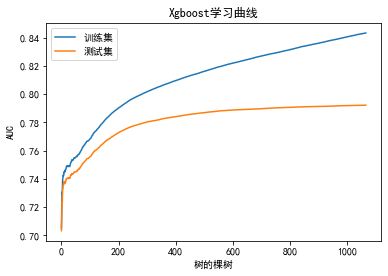

In [36]:
xgb_result = xgb_clf.evals_result()
xgb_epochs = len(xgb_result['validation_0']['auc_neg'])
x_axis = range(0,xgb_epochs)
fig,ax = plt.subplots()
xgb_result_0 = [auc*(-1) for auc in xgb_result['validation_0']['auc_neg']]
xgb_result_1 = [auc*(-1) for auc in xgb_result['validation_1']['auc_neg']]
ax.plot(x_axis, xgb_result_0, label='训练集')
ax.plot(x_axis, xgb_result_1, label='测试集')
ax.legend()
plt.xlabel('树的棵树')
plt.ylabel('AUC')
plt.title('Xgboost学习曲线')
plt.show()

## 模型评估 

In [37]:
data_train = data_xgb.iloc[X_train.index,:]
data_test = data_xgb.iloc[X_test.index,:]

In [42]:
data_train['prob'] = xgb_clf.predict_proba(X_matrix_train,ntree_limit=xgb_clf.best_ntree_limit)[:,0]
auc_dict = auc_calc(data_train,['prob'],['TARGET'])
ks_dict = ks_calc(data_train,['prob'],['TARGET'])
auc_value = auc_dict['auc']
ks_value = ks_dict['ks']
print('train auc: %f\ntrain ks: %f' %(auc_value,ks_value))

train auc: 0.843071
train ks: 0.530332


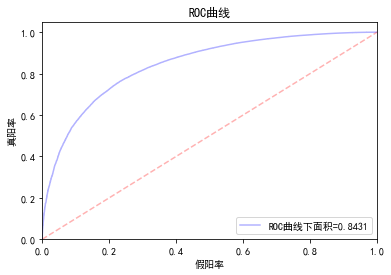

In [43]:
auc_dict['auc_fig']

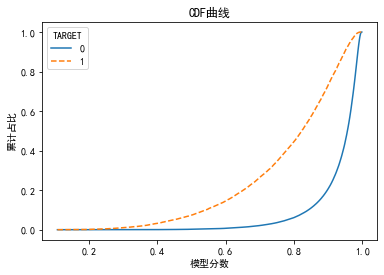

In [44]:
ks_dict['ks_fig']

In [45]:
data_test['prob'] = xgb_clf.predict_proba(X_matrix_test,ntree_limit=xgb_clf.best_ntree_limit)[:,0]
auc_dict = auc_calc(data_test,['prob'],['TARGET'])
ks_dict = ks_calc(data_test,['prob'],['TARGET'])
psi_dict = psi_calc(data_train['prob'],data_test['prob'])
auc_value = auc_dict['auc']
ks_value = ks_dict['ks']
psi_value = psi_dict['psi']
print('test auc: %f\ntest ks: %f\ntest psi: %f' %(auc_value,ks_value,psi_value))

test auc: 0.792243
test ks: 0.447480
test psi: 0.000165


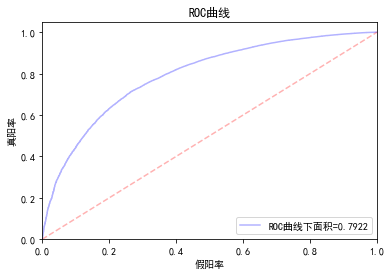

In [46]:
auc_dict['auc_fig']

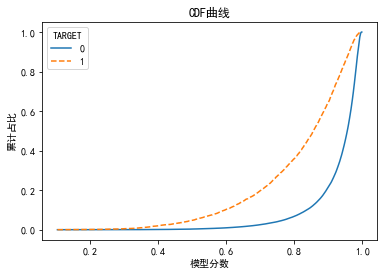

In [47]:
ks_dict['ks_fig']

## SHAP分析 

In [48]:
explainer = shap.TreeExplainer(xgb_clf)

In [49]:
shap_values = explainer.shap_values(data_train[X_columns])
print(shap_values.shape)

(215257, 169)


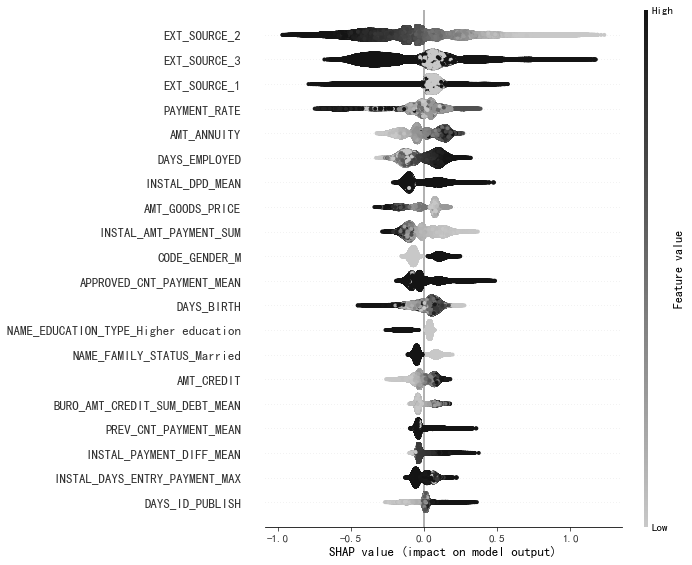

In [56]:
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

RGB_val = 255

color01= (200,200,200)  # Blue wanted
color04= (20,20,20)  # red wanted
Colors = [color01, color04]

# Creating a blue red palette transition for graphics
Colors= [(R/RGB_val,G/RGB_val,B/RGB_val) for idx, (R,G,B) in enumerate(Colors)]
n = 256

# Start of the creation of the gradient
Color01= ListedColormap(Colors[0], name='Color01', N=None)
Color04= ListedColormap(Colors[1], name='Color04', N=None)
top = cm.get_cmap(Color01,128)
bottom = cm.get_cmap(Color04,128)
newcolors = np.vstack((top(np.linspace(0, 1, 128)),
                       bottom(np.linspace(0, 1, 128))))

mymin0 = newcolors[0][0]
mymin1 = newcolors[0][1]
mymin2 = newcolors[0][2]
mymin3 = newcolors[0][3]
mymax0 = newcolors[255][0]
mymax1 = newcolors[255][1]
mymax2 = newcolors[255][2]
mymax3 = newcolors[255][3]

GradientBlueRed= [np.linspace(mymin0, mymax0,  n),
                   np.linspace(mymin1, mymax1,  n),
                   np.linspace(mymin2, mymax2,  n),
                   np.linspace(mymin3, mymax3,  n)]

GradientBlueRed_res =np.transpose(GradientBlueRed)

newcmp = ListedColormap(GradientBlueRed_res, name='BlueRed')

plt.figure()
shap.summary_plot(shap_values,data_train[X_columns],show=False)

for fc in plt.gcf().get_children():
    for fcc in fc.get_children():
        if hasattr(fcc, "set_cmap"):
            fcc.set_cmap(newcmp)

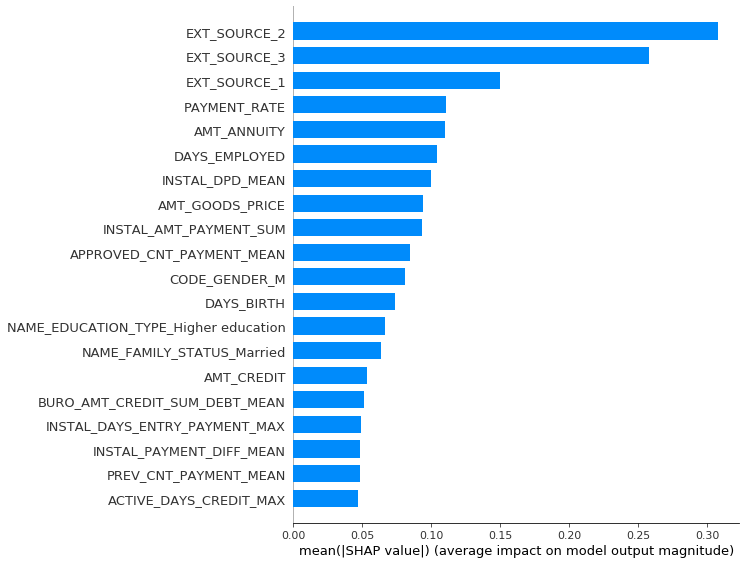

In [20]:
shap.summary_plot(shap_values,data_train[X_columns],plot_type='bar')

## 保存模型 

In [219]:
joblib.dump(xgb_clf,'/Users/caizhuxi/Desktop/home-credit-default-risk/model_xgb.pkl')

['/Users/caizhuxi/Desktop/home-credit-default-risk/model_xgb.pkl']

In [11]:
#xgb_clf = joblib.load('/Users/caizhuxi/Desktop/home-credit-default-risk/model_xgb.pkl')

# Wide&Deep模型

In [6]:
data_wd = data.copy()

In [7]:
data_wd = data_wd.fillna(0)

## 划分wide和deep特征 

In [8]:
X_columns = data_wd.columns[2:]
Y_columns = 'TARGET'

In [9]:
columns_wide = eda_stat[eda_stat['count_unique']>2].index.tolist()[1:]
columns_deep = eda_stat[eda_stat['count_unique']<=2].index.tolist()[1:]

In [10]:
print(len(columns_wide))
print(len(columns_deep))

580
234


## 标准化处理 

In [11]:
scaler = preprocessing.StandardScaler()

In [12]:
data_wd[X_columns] = scaler.fit_transform(data_wd[X_columns])

In [13]:
X_train,X_test,y_train,y_test = train_test_split(data_wd[X_columns],data_wd[Y_columns],test_size=0.3,random_state=0)

## 训练Wide&Deep模型 

In [14]:
#自定义metric
def auroc(y_true,y_pred):
    return tf.numpy_function(roc_auc_score, (y_true,y_pred), tf.double)

In [15]:
wide_input = Input(shape=(580,),name='wide_input')
wide_output = Dense(128,activation='relu',
                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
                   bias_initializer=initializers.Constant(value=0),
                   kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0))(wide_input)
wide_output = Dropout(0.3)(wide_output)

In [256]:
#wide_output = Dense(1,activation='sigmoid',
#                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
#                   bias_initializer=initializers.Constant(value=0),
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0))(wide_output)

In [16]:
wide_model = Model(inputs=[wide_input],outputs=wide_output)

In [258]:
#sgd = optimizers.SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)
#wide_model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=[roc_auc])

In [259]:
#history = wide_model.fit(X_train[columns_wide],y_train,
#                           batch_size=2048,epochs=100,
#                           validation_data=(X_test[columns_wide],y_test),
#                           shuffle=True,verbose=2
#                           )

Train on 215257 samples, validate on 92254 samples
Epoch 1/100
215257/215257 - 7s - loss: 3.5198 - roc_auc: 0.5111 - val_loss: 3.4185 - val_roc_auc: 0.5097
Epoch 2/100


KeyboardInterrupt: 

In [17]:
deep_input = Input(shape=(234,),name='deep_input')
#deep_embed = Embedding(2,8,input_length=234)(deep_input)
#deep_embed = Flatten()(deep_embed)
#deep_output = BatchNormalization()(deep_embed)
#deep_output = Dense(256,activation='relu',
#                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
#                   bias_initializer=initializers.Constant(value=0),
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0))(deep_output)
deep_output = Dense(128,activation='relu',
                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
                   bias_initializer=initializers.Constant(value=0),
                   kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0))(deep_input)
deep_output = Dropout(0.3)(deep_output)
deep_output = BatchNormalization()(deep_output)
deep_output = Dense(64,activation='relu',
                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
                   bias_initializer=initializers.Constant(value=0),
                   kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0))(deep_output)
deep_output = Dropout(0.3)(deep_output)

In [264]:
#deep_output = Dense(1,activation='sigmoid',
#                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
#                   bias_initializer=initializers.Constant(value=0),
#                   kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0))(deep_output)

In [18]:
deep_model = Model(inputs=[deep_input],outputs=deep_output)

In [266]:
#sgd = optimizers.SGD(lr=0.001,momentum=0.0,decay=0.0,nesterov=False)
#deep_model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=[roc_auc])

In [267]:
#history = deep_model.fit(X_train[columns_deep],y_train,
#                           batch_size=2048,epochs=100,
#                           validation_data=(X_test[columns_deep],y_test),
#                           shuffle=True,verbose=2
#                           )

Train on 215257 samples, validate on 92254 samples
Epoch 1/100
215257/215257 - 6s - loss: 2.1919 - roc_auc: 0.5157 - val_loss: 2.1721 - val_roc_auc: 0.5252
Epoch 2/100
215257/215257 - 5s - loss: 2.1313 - roc_auc: 0.5186 - val_loss: 2.1236 - val_roc_auc: 0.5291
Epoch 3/100


KeyboardInterrupt: 

In [19]:
combine_input = layers.concatenate([wide_model.output,deep_model.output],name='combine_input')
combine_input = BatchNormalization()(combine_input)
#combine_output = Dense(128,activation='relu',
#                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
#                   bias_initializer=initializers.Constant(value=0),
#                   kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0))(combine_input)
#combine_output = Dropout(0.3)(combine_output)
combine_output = Dense(1,activation='sigmoid',
                   kernel_initializer=initializers.RandomNormal(mean=0.0,stddev=0.05,seed=0),
                   bias_initializer=initializers.Constant(value=0),
                   kernel_regularizer=regularizers.l1_l2(l1=0.01,l2=0),name='widedeep_output')(combine_input)
#combine_output = Dropout(0.3)(combine_output)
combine_model = Model(inputs=wide_model.inputs+deep_model.inputs,outputs=combine_output)

In [20]:
combine_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 234)]        0                                            
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 128)          30080       deep_input[0][0]                 
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 128)          0           dense_1[0][0]                    
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 580)]        0                                            
____________________________________________________________________________________________

In [291]:
#sgd = optimizers.SGD(lr=0.0001,momentum=0.0,decay=0.0,nesterov=False)
#combine_model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=[auroc])

In [20]:
adam = optimizers.Adam(lr=0.0001)
combine_model.compile(optimizer=adam,loss='binary_crossentropy',metrics=[auroc])

In [22]:
early_stopping = EarlyStopping(monitor='val_auroc',patience=20,verbose=2,mode='max')
time_save = time.strftime('%Y%m%d%H%M',time.localtime())
filepath_save = '/Users/caizhuxi/Desktop/home-credit-default-risk/model_wd_'+time_save+'.h5'
checkpoint = ModelCheckpoint(filepath_save,monitor='val_auroc',verbose=1,save_best_only=True,mode='max',save_freq=1)
history = combine_model.fit([X_train[columns_wide]]+[X_train[columns_deep]],y_train,
                           batch_size=2048,epochs=200,
                           validation_data=([X_test[columns_wide]]+[X_test[columns_deep]],y_test),
                           shuffle=True,callbacks=[early_stopping,checkpoint]
                           )

Epoch 1/200
 66/106 [=================>............] - ETA: 1s - loss: 1.5744 - auroc: 0.6098WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 4s 36ms/step - loss: 1.4716 - auroc: 0.6142 - val_loss: 1.2089 - val_auroc: 0.6741
Epoch 2/200
106/106 [==============================] - 3s 27ms/step - loss: 1.0225 - auroc: 0.6426 - val_loss: 0.8559 - val_auroc: 0.7009
Epoch 3/200
  4/106 [>.............................] - ETA: 1s - loss: 0.8623 - auroc: 0.6466WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 81/106 [=====================>........] - ETA: 0s - loss: 0.7777 - auroc: 0.6655WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.7559 - auroc: 0.6694 - val_loss: 0.6488 - val_auroc: 0.7210
Epoch 4/200
106/106 [==============================] - 3s 26ms/step - loss: 0.6009 - auroc: 0.6923 - val_loss: 0.5350 - val_auroc: 0.7272
Epoch 5/200
 19/106 [====>.........................] - ETA: 1s - loss: 0.5434 - auroc: 0.6929WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 96/106 [==========================>...] - ETA: 0s - loss: 0.5193 - auroc: 0.7057WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.5166 - auroc: 0.7069 - val_loss: 0.4780 - val_auroc: 0.7312
Epoch 6/200
 65/106 [=================>............] - ETA: 0s - loss: 0.4755 - auroc: 0.7156WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.4684 - auroc: 0.7180 - val_loss: 0.4476 - val_auroc: 0.7393
Epoch 7/200
 34/106 [========>.....................] - ETA: 1s - loss: 0.4490 - auroc: 0.7246WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.4413 - auroc: 0.7229 - val_loss: 0.4295 - val_auroc: 0.7343
Epoch 8/200
  4/106 [>.............................] - ETA: 1s - loss: 0.4351 - auroc: 0.7144WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 82/106 [======================>.......] - ETA: 0s - loss: 0.4277 - auroc: 0.7260WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.4252 - auroc: 0.7270 - val_loss: 0.4168 - val_auroc: 0.7426
Epoch 9/200
 52/106 [=============>................] - ETA: 1s - loss: 0.4161 - auroc: 0.7271WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.4153 - auroc: 0.7269 - val_loss: 0.4084 - val_auroc: 0.7451
Epoch 10/200
 22/106 [=====>........................] - ETA: 1s - loss: 0.4135 - auroc: 0.7270WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 98/106 [==========================>...] - ETA: 0s - loss: 0.4086 - auroc: 0.7313WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.4083 - auroc: 0.7312 - val_loss: 0.4002 - val_auroc: 0.7498
Epoch 11/200
106/106 [==============================] - 3s 27ms/step - loss: 0.4029 - auroc: 0.7314 - val_loss: 0.3947 - val_auroc: 0.7478
Epoch 12/200
 36/106 [=========>....................] - ETA: 1s - loss: 0.4015 - auroc: 0.7338WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 29ms/step - loss: 0.3973 - auroc: 0.7335 - val_loss: 0.3907 - val_auroc: 0.7481
Epoch 13/200
  4/106 [>.............................] - ETA: 1s - loss: 0.3916 - auroc: 0.7209WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 81/106 [=====================>........] - ETA: 0s - loss: 0.3919 - auroc: 0.7344WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3917 - auroc: 0.7340 - val_loss: 0.3861 - val_auroc: 0.7460
Epoch 14/200
 50/106 [=============>................] - ETA: 1s - loss: 0.3908 - auroc: 0.7334WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 28ms/step - loss: 0.3882 - auroc: 0.7329 - val_loss: 0.3820 - val_auroc: 0.7452
Epoch 15/200
 94/106 [=========================>....] - ETA: 0s - loss: 0.3848 - auroc: 0.7326WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3842 - auroc: 0.7325 - val_loss: 0.3789 - val_auroc: 0.7384
Epoch 16/200
 63/106 [================>.............] - ETA: 0s - loss: 0.3815 - auroc: 0.7309WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3803 - auroc: 0.7314 - val_loss: 0.3758 - val_auroc: 0.7379
Epoch 17/200
 32/106 [========>.....................] - ETA: 1s - loss: 0.3798 - auroc: 0.7258WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3771 - auroc: 0.7304 - val_loss: 0.3683 - val_auroc: 0.7564
Epoch 18/200
 78/106 [=====================>........] - ETA: 0s - loss: 0.3738 - auroc: 0.7328WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 28ms/step - loss: 0.3729 - auroc: 0.7331 - val_loss: 0.3674 - val_auroc: 0.7372
Epoch 19/200
106/106 [==============================] - 3s 26ms/step - loss: 0.3697 - auroc: 0.7313 - val_loss: 0.3608 - val_auroc: 0.7501
Epoch 20/200
 16/106 [===>..........................] - ETA: 1s - loss: 0.3692 - auroc: 0.7260WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 93/106 [=========================>....] - ETA: 0s - loss: 0.3661 - auroc: 0.7329WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3656 - auroc: 0.7336 - val_loss: 0.3593 - val_auroc: 0.7470
Epoch 21/200
 64/106 [=================>............] - ETA: 0s - loss: 0.3609 - auroc: 0.7365WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3624 - auroc: 0.7337 - val_loss: 0.3559 - val_auroc: 0.7507
Epoch 22/200
106/106 [==============================] - 3s 27ms/step - loss: 0.3590 - auroc: 0.7344 - val_loss: 0.3522 - val_auroc: 0.7572
Epoch 23/200
  1/106 [..............................] - ETA: 0s - loss: 0.3637 - auroc: 0.7517WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3573 - auroc: 0.7325 - val_loss: 0.3486 - val_auroc: 0.7522
Epoch 24/200
 46/106 [============>.................] - ETA: 1s - loss: 0.3549 - auroc: 0.7351WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3537 - auroc: 0.7351 - val_loss: 0.3500 - val_auroc: 0.7434
Epoch 25/200
 16/106 [===>..........................] - ETA: 1s - loss: 0.3585 - auroc: 0.7187WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3522 - auroc: 0.7352 - val_loss: 0.3450 - val_auroc: 0.7550
Epoch 26/200
 58/106 [===============>..............] - ETA: 1s - loss: 0.3516 - auroc: 0.7348WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3501 - auroc: 0.7343 - val_loss: 0.3449 - val_auroc: 0.7491
Epoch 27/200
 28/106 [======>.......................] - ETA: 1s - loss: 0.3549 - auroc: 0.7284WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3486 - auroc: 0.7354 - val_loss: 0.3433 - val_auroc: 0.7449


Epoch 28/200
106/106 [==============================] - 3s 26ms/step - loss: 0.3469 - auroc: 0.7355 - val_loss: 0.3409 - val_auroc: 0.7509
Epoch 29/200
 43/106 [===========>..................] - ETA: 1s - loss: 0.3423 - auroc: 0.7373WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 25ms/step - loss: 0.3451 - auroc: 0.7339 - val_loss: 0.3398 - val_auroc: 0.7475
Epoch 30/200
 13/106 [==>...........................] - ETA: 1s - loss: 0.3453 - auroc: 0.7328WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 91/106 [========================>.....] - ETA: 0s - loss: 0.3437 - auroc: 0.7346WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3436 - auroc: 0.7339 - val_loss: 0.3357 - val_auroc: 0.7562
Epoch 31/200
 61/106 [================>.............] - ETA: 0s - loss: 0.3424 - auroc: 0.7347WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 25ms/step - loss: 0.3414 - auroc: 0.7358 - val_loss: 0.3342 - val_auroc: 0.7543
Epoch 32/200
106/106 [==============================] - 3s 26ms/step - loss: 0.3402 - auroc: 0.7348 - val_loss: 0.3327 - val_auroc: 0.7551
Epoch 33/200


 75/106 [====================>.........] - ETA: 0s - loss: 0.3387 - auroc: 0.7354WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3386 - auroc: 0.7344 - val_loss: 0.3314 - val_auroc: 0.7542
Epoch 34/200
 46/106 [============>.................] - ETA: 1s - loss: 0.3368 - auroc: 0.7338WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3368 - auroc: 0.7355 - val_loss: 0.3298 - val_auroc: 0.7580
Epoch 35/200
 16/106 [===>..........................] - ETA: 1s - loss: 0.3396 - auroc: 0.7362WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3349 - auroc: 0.7367 - val_loss: 0.3285 - val_auroc: 0.7563
Epoch 36/200
 59/106 [===============>..............] - ETA: 1s - loss: 0.3340 - auroc: 0.7358WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 27ms/step - loss: 0.3342 - auroc: 0.7352 - val_loss: 0.3275 - val_auroc: 0.7569
Epoch 37/200
 28/106 [======>.......................] - ETA: 1s - loss: 0.3370 - auroc: 0.7300WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3329 - auroc: 0.7362 - val_loss: 0.3253 - val_auroc: 0.7577


Epoch 38/200
106/106 [==============================] - 3s 26ms/step - loss: 0.3317 - auroc: 0.7360 - val_loss: 0.3245 - val_auroc: 0.7558
Epoch 39/200
 43/106 [===========>..................] - ETA: 1s - loss: 0.3340 - auroc: 0.7308WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3307 - auroc: 0.7345 - val_loss: 0.3238 - val_auroc: 0.7486
Epoch 40/200
 13/106 [==>...........................] - ETA: 1s - loss: 0.3261 - auroc: 0.7417WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 91/106 [========================>.....] - ETA: 0s - loss: 0.3289 - auroc: 0.7334WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3293 - auroc: 0.7339 - val_loss: 0.3224 - val_auroc: 0.7536
Epoch 41/200
106/106 [==============================] - 3s 26ms/step - loss: 0.3279 - auroc: 0.7369 - val_loss: 0.3205 - val_auroc: 0.7559
Epoch 42/200
 28/106 [======>.......................] - ETA: 1s - loss: 0.3260 - auroc: 0.7401WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3273 - auroc: 0.7338 - val_loss: 0.3205 - val_auroc: 0.7551
Epoch 43/200


106/106 [==============================] - 3s 26ms/step - loss: 0.3261 - auroc: 0.7358 - val_loss: 0.3191 - val_auroc: 0.7545
Epoch 44/200
 43/106 [===========>..................] - ETA: 1s - loss: 0.3251 - auroc: 0.7325WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 25ms/step - loss: 0.3254 - auroc: 0.7336 - val_loss: 0.3185 - val_auroc: 0.7541
Epoch 45/200
 13/106 [==>...........................] - ETA: 1s - loss: 0.3229 - auroc: 0.7289WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 90/106 [========================>.....] - ETA: 0s - loss: 0.3237 - auroc: 0.7353WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 25ms/step - loss: 0.3238 - auroc: 0.7356 - val_loss: 0.3170 - val_auroc: 0.7571
Epoch 46/200
 60/106 [===============>..............] - ETA: 1s - loss: 0.3212 - auroc: 0.7350WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3227 - auroc: 0.7337 - val_loss: 0.3154 - val_auroc: 0.7576
Epoch 47/200
106/106 [==============================] - 3s 26ms/step - loss: 0.3219 - auroc: 0.7358 - val_loss: 0.3155 - val_auroc: 0.7542


Epoch 48/200
 75/106 [====================>.........] - ETA: 0s - loss: 0.3213 - auroc: 0.7364WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3206 - auroc: 0.7368 - val_loss: 0.3131 - val_auroc: 0.7579
Epoch 49/200
 43/106 [===========>..................] - ETA: 1s - loss: 0.3213 - auroc: 0.7344WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3199 - auroc: 0.7359 - val_loss: 0.3133 - val_auroc: 0.7513
Epoch 50/200
 13/106 [==>...........................] - ETA: 1s - loss: 0.3220 - auroc: 0.7311WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


 90/106 [========================>.....] - ETA: 0s - loss: 0.3191 - auroc: 0.7349WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3196 - auroc: 0.7338 - val_loss: 0.3122 - val_auroc: 0.7576
Epoch 51/200
 60/106 [===============>..............] - ETA: 1s - loss: 0.3181 - auroc: 0.7361WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3185 - auroc: 0.7333 - val_loss: 0.3126 - val_auroc: 0.7576
Epoch 52/200
106/106 [==============================] - 3s 27ms/step - loss: 0.3191 - auroc: 0.7348 - val_loss: 0.3117 - val_auroc: 0.7542


Epoch 53/200
 73/106 [===================>..........] - ETA: 0s - loss: 0.3195 - auroc: 0.7357WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3186 - auroc: 0.7347 - val_loss: 0.3108 - val_auroc: 0.7573
Epoch 54/200
 42/106 [==========>...................] - ETA: 1s - loss: 0.3182 - auroc: 0.7345WARNING:tensorflow:Can save best model only with val_auroc available, skipping.


106/106 [==============================] - 3s 26ms/step - loss: 0.3179 - auroc: 0.7343 - val_loss: 0.3107 - val_auroc: 0.7550
Epoch 00054: early stopping


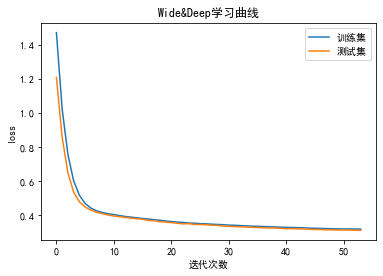

In [23]:
wd_epochs = len(history.history['loss'])
x_axis = range(0,wd_epochs)
fig,ax = plt.subplots()
ax.plot(x_axis, history.history['loss'], label='训练集')
ax.plot(x_axis, history.history['val_loss'], label='测试集')
ax.legend()
plt.xlabel('迭代次数')
plt.ylabel('loss')
plt.title('Wide&Deep学习曲线')
plt.show()

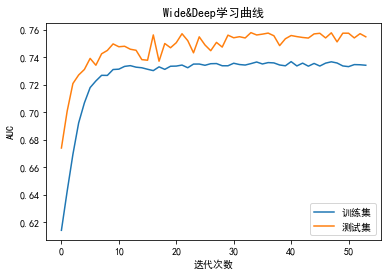

In [24]:
wd_epochs = len(history.history['auroc'])
x_axis = range(0,wd_epochs)
fig,ax = plt.subplots()
ax.plot(x_axis, history.history['auroc'], label='训练集')
ax.plot(x_axis, history.history['val_auroc'], label='测试集')
ax.legend()
plt.xlabel('迭代次数')
plt.ylabel('AUC')
plt.title('Wide&Deep学习曲线')
plt.show()

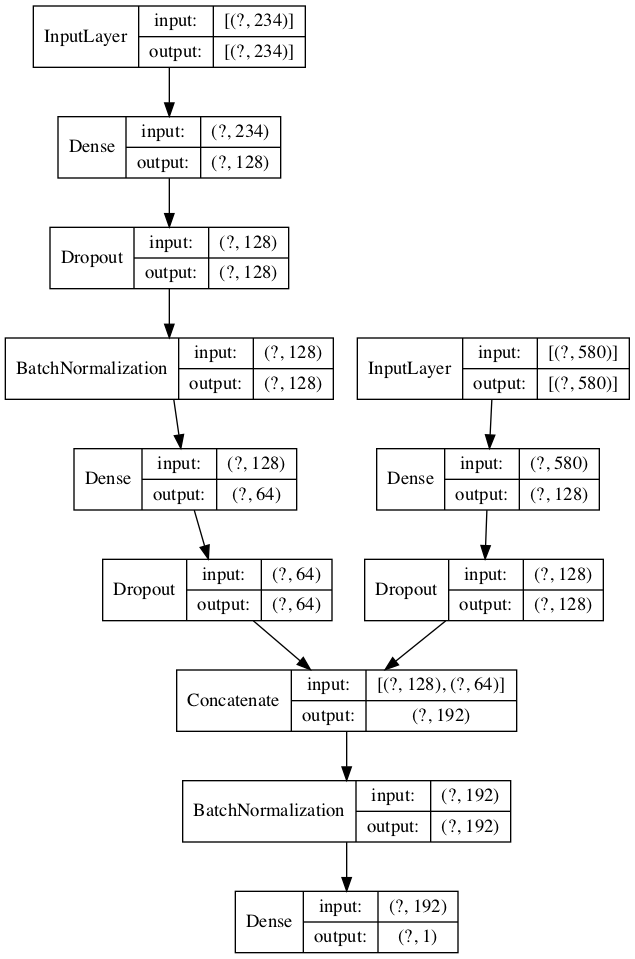

In [23]:
plot_model(combine_model, to_file='combine_model.png', show_shapes=True, show_layer_names=False)

## 模型评估 

In [35]:
filepath_save = '/Users/caizhuxi/Desktop/home-credit-default-risk/model_wd_202005200746.h5'

In [36]:
combine_model.load_weights(filepath_save)

In [37]:
data_train = data_wd.iloc[X_train.index,:]
data_test = data_wd.iloc[X_test.index,:]

In [38]:
data_train['prob'] = 1-combine_model.predict([X_train[columns_wide]]+[X_train[columns_deep]])
auc_dict = auc_calc(data_train,['prob'],['TARGET'])
ks_dict = ks_calc(data_train,['prob'],['TARGET'])
auc_value = auc_dict['auc']
ks_value = ks_dict['ks']
print('train auc: %f\ntrain ks: %f' %(auc_value,ks_value))

train auc: 0.748193
train ks: 0.370443


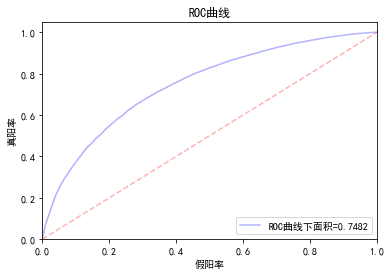

In [39]:
auc_dict['auc_fig']

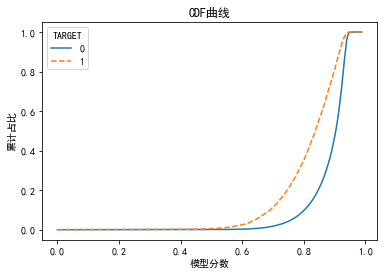

In [40]:
ks_dict['ks_fig']

In [41]:
data_test['prob'] = 1-combine_model.predict([X_test[columns_wide]]+[X_test[columns_deep]])
auc_dict = auc_calc(data_test,['prob'],['TARGET'])
ks_dict = ks_calc(data_test,['prob'],['TARGET'])
psi_dict = psi_calc(data_train['prob'],data_test['prob'])
auc_value = auc_dict['auc']
ks_value = ks_dict['ks']
psi_value = psi_dict['psi']
print('test auc: %f\ntest ks: %f\ntest psi: %f' %(auc_value,ks_value,psi_value))

test auc: 0.749979
test ks: 0.372426
test psi: 0.000054


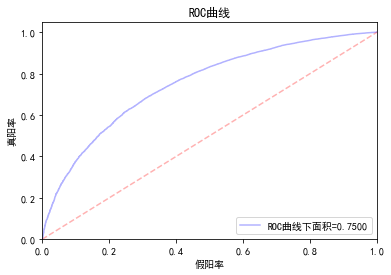

In [42]:
auc_dict['auc_fig']

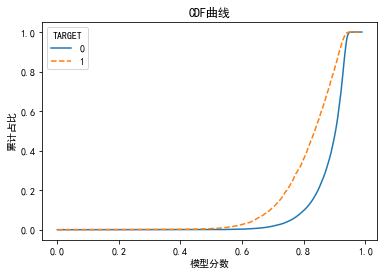

In [43]:
ks_dict['ks_fig']

# 模型应用 

## LR模型 

In [91]:
data_lr = data.copy()

In [92]:
columns_select = [
    'EXT_SOURCE_3','EXT_SOURCE_2','EXT_SOURCE_1','DAYS_EMPLOYED','DAYS_BIRTH','BURO_DAYS_CREDIT_ENDDATE_MEAN',
    'CLOSED_AMT_CREDIT_SUM_MAX','BURO_AMT_CREDIT_SUM_DEBT_MEAN','CLOSED_AMT_CREDIT_SUM_SUM','AMT_GOODS_PRICE',
    'REGION_RATING_CLIENT_W_CITY'
]

In [93]:
len(columns_select)

11

In [94]:
data_lr = data_lr[['SK_ID_CURR','TARGET']+columns_select]

In [31]:
data_woe = pd.read_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/homecredit_feature_woe.csv')

In [95]:
data_lr[columns_select] = data_woe[columns_select]

In [96]:
X_columns = data_lr.columns[2:]
Y_columns = 'TARGET'

In [97]:
X_train,X_test,y_train,y_test = train_test_split(data_lr[X_columns],data_lr[Y_columns],test_size=0.3,random_state=0)

In [98]:
data_train = data_lr.ix[X_train.index,:]
data_test = data_lr.ix[X_test.index,:]

In [103]:
print(len(data_test))
print(len(data_test[data_test['TARGET']==1]))

92254
7340


In [99]:
lr = LogisticRegression(penalty='l2',C=0.1)

In [100]:
lr_clf = lr.fit(X_train,y_train)

In [101]:
data_test['prob'] = lr_clf.predict_proba(X_test)[:,0]
data_test['odds'] = data_test['prob'] / (1 - data_test['prob'])
data_test['score'] = (np.log(data_test['odds']) * (20 / np.log(2)) + 533.6).astype(int)
min = data_test['score'].min() // 20 * 20
max = (data_test['score'].max() // 20 + 2) * 20
score_bins = list(range(min,max,20))
data_test['scorebin'] = pd.cut(data_test['score'],bins=score_bins)
result_test = pd.crosstab(data_test['scorebin'],data_test['TARGET'])
result_test.columns = ['Good','Bad']
result_test['Total'] = result_test.sum(axis=1)
result_test['TotalRate'] = result_test['Total'] / result_test.ix[:,'Total'].sum()
result_test['BadRate'] = result_test['Bad'] / result_test['Total']
result_test

,Good,Bad,Total,BadRate,TotalRate
scorebin,,,,,
"(520, 540]",84,41,125,0.328000,0.001355
"(540, 560]",1258,593,1851,0.320367,0.020064
"(560, 580]",6808,1832,8640,0.212037,0.093654
"(580, 600]",17625,2276,19901,0.114366,0.215720
"(600, 620]",24855,1636,26491,0.061757,0.287153
"(620, 640]",21988,732,22720,0.032218,0.246277
"(640, 660]",10067,200,10267,0.019480,0.111291
"(660, 680]",2074,25,2099,0.011910,0.022752
"(680, 700]",155,5,160,0.031250,0.001734


## Xgboost模型

In [78]:
data_xgb = data.copy()

In [79]:
data_xgb = data_xgb.fillna(-9999)

In [80]:
feature_importances = pd.read_csv('/Users/caizhuxi/Desktop/home-credit-default-risk/feature_importances_xgb.csv')

In [81]:
len(feature_importances[feature_importances['importance']>0.0024])

169

In [82]:
columns_select = feature_importances.ix[feature_importances['importance']>0.0024,'feature'].tolist()

In [83]:
data_xgb = data_xgb[['SK_ID_CURR','TARGET']+columns_select]

In [84]:
data_xgb.shape

(307511, 171)

In [85]:
X_columns = data_xgb.columns[2:]
Y_columns = ['TARGET']

In [86]:
X_train,X_test,y_train,y_test = train_test_split(data_xgb[X_columns],data_xgb[Y_columns],test_size=0.3,random_state=0)

In [87]:
X_matrix_train = X_train.as_matrix(columns=None)
Y_matrix_train = y_train.as_matrix(columns=None)
X_matrix_test = X_test.as_matrix(columns=None)
Y_matrix_test = y_test.as_matrix(columns=None)
eval_set = [(X_matrix_train,Y_matrix_train),(X_matrix_test,Y_matrix_test)]

In [88]:
data_train = data_xgb.ix[X_train.index,:]
data_test = data_xgb.ix[X_test.index,:]

In [102]:
print(len(data_test))
print(len(data_test[data_test['TARGET']==1]))

92254
7340


In [89]:
xgb_clf = joblib.load('/Users/caizhuxi/Desktop/home-credit-default-risk/model_xgb.pkl')

In [90]:
data_test['prob'] = xgb_clf.predict_proba(X_matrix_test,ntree_limit=xgb_clf.best_ntree_limit)[:,0]
data_test['odds'] = data_test['prob'] / (1 - data_test['prob'])
data_test['score'] = (np.log(data_test['odds']) * (20 / np.log(2)) + 533.6).astype(int)
min = data_test['score'].min() // 20 * 20
max = (data_test['score'].max() // 20 + 2) * 20
score_bins = list(range(min,max,20))
data_test['scorebin'] = pd.cut(data_test['score'],bins=score_bins)
result_test = pd.crosstab(data_test['scorebin'],data_test['TARGET'])
result_test.columns = ['Good','Bad']
result_test['Total'] = result_test.sum(axis=1)
result_test['TotalRate'] = result_test['Total'] / result_test.ix[:,'Total'].sum()
result_test['BadRate'] = result_test['Bad'] / result_test['Total']
result_test

,Good,Bad,Total,BadRate,TotalRate
scorebin,,,,,
"(460, 480]",0,3,3,1.000000,0.000033
"(480, 500]",7,16,23,0.695652,0.000249
"(500, 520]",77,120,197,0.609137,0.002135
"(520, 540]",496,441,937,0.470651,0.010157
"(540, 560]",2010,1066,3076,0.346554,0.033343
"(560, 580]",5980,1645,7625,0.215738,0.082652
"(580, 600]",12762,1761,14523,0.121256,0.157424
"(600, 620]",19519,1299,20818,0.062398,0.225660
"(620, 640]",21328,701,22029,0.031822,0.238786
